<a href="https://colab.research.google.com/github/Ayona123/Drug_repurposing/blob/main/8702_TEST_1201-1250.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4673]:
# Install RDKit.
%%capture
!pip install rdkit-pypi

In [4674]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

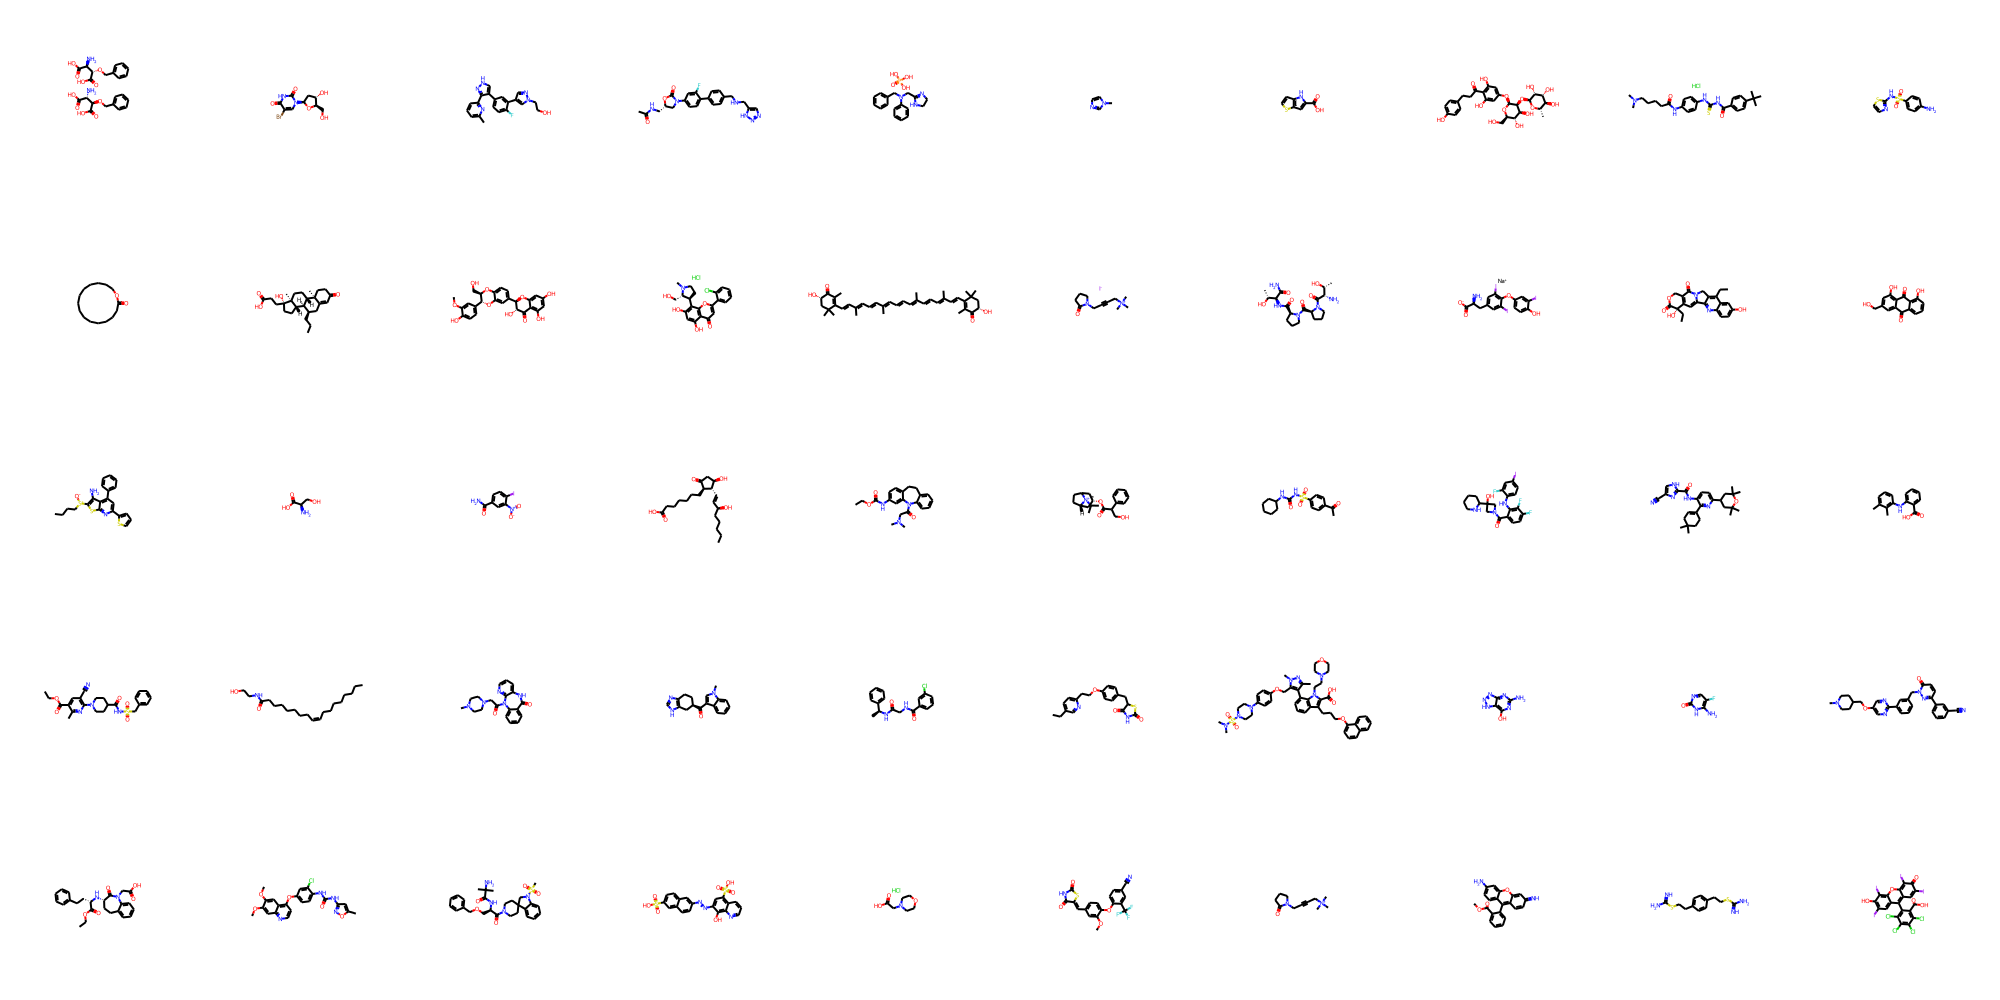

In [4675]:
smiles_list = [
'N[C@@H](C(=O)O)[C@@H](OCc1ccccc1)C(=O)O.N[C@H](C(=O)O)[C@H](OCc1ccccc1)C(=O)O',
'O=c1[nH]c(=O)n([C@H]2C[C@H](O)[C@@H](CO)O2)cc1Br',
'Cc1cccc(-c2n[nH]cc2-c2ccc(F)c(-c3cnn(CCO)c3)c2)n1',
'CC(=O)NC[C@H]1CN(c2ccc(-c3ccc(CNCc4cnn[nH]4)cc3)c(F)c2)C(=O)O1',
'O=P(O)(O)O.c1ccc(CN(CC2=NCCN2)c2ccccc2)cc1',
'Cn1ccnc1',
'O=C(O)c1cc2sccc2[nH]1',
'C[C@@H]1O[C@@H](O[C@@H]2[C@H](Oc3cc(O)c(C(=O)CCc4ccc(O)cc4)c(O)c3)O[C@H](CO)[C@@H](O)[C@@H]2O)[C@H](O)[C@H](O)[C@H]1O',
'CN(C)CCCCC(=O)Nc1ccc(NC(=S)NC(=O)c2ccc(C(C)(C)C)cc2)cc1.Cl',
'Nc1ccc(S(=O)(=O)Nc2nccs2)cc1',
'O=C1CCCCCCCCCCCCCCO1',
'CCC[C@@H]1CC2=CC(=O)CC[C@]2(C)[C@H]2CC[C@@]3(C)[C@@H](CC[C@@]3(O)CCC(=O)O)[C@@H]21',
'COc1cc([C@H]2Oc3cc([C@H]4Oc5cc(O)cc(O)c5C(=O)[C@@H]4O)ccc3O[C@@H]2CO)ccc1O',
'CN1CC[C@@H](c2c(O)cc(O)c3c(=O)cc(-c4ccccc4Cl)oc23)[C@@H]1CO.Cl',
'CC1=C(/C=C/C(C)=C/C=C/C(C)=C/C=C/C=C(C)/C=C/C=C(C)/C=C/C2=C(C)C(=O)[C@@H](O)CC2(C)C)C(C)(C)C[C@H](O)C1=O',
'C[N+](C)(C)CC#CCN1CCCC1=O.[I-]',
'C[C@@H](O)[C@H](N)C(=O)N1CCC[C@H]1C(=O)N1CCC[C@H]1C(=O)N[C@H](C(N)=O)[C@@H](C)O',
'N[C@@H](Cc1cc(I)c(Oc2ccc(O)c(I)c2)c(I)c1)C(=O)[O-].[Na+]',
'CCc1c2c(nc3ccc(O)cc13)-c1cc3c(c(=O)n1C2)COC(=O)[C@]3(O)CC',
'O=C1c2cccc(O)c2C(=O)c2c(O)cc(CO)cc21',
'CCCC[S+]([O-])c1sc2nc(-c3cccs3)cc(-c3ccccc3)c2c1N',
'N[C@H](CO)C(=O)O',
'NC(=O)c1ccc(I)c([N+](=O)[O-])c1',
'CCCCC[C@H](O)/C=C/[C@H]1[C@H](O)CC(=O)[C@@H]1CCCCCCC(=O)O',
'CCOC(=O)Nc1ccc2c(c1)N(C(=O)CN(C)C)c1ccccc1CC2',
'CC(C)[N@+]1(C)C2CC[C@H]1C[C@@H](OC(=O)C(CO)c1ccccc1)C2',
'CC(=O)c1ccc(S(=O)(=O)NC(=O)NC2CCCCC2)cc1',
'O=C(c1ccc(F)c(F)c1Nc1ccc(I)cc1F)N1CC(O)(C2CCCCN2)C1',
'CC1(C)CC=C(c2nc(C3CC(C)(C)OC(C)(C)C3)ccc2NC(=O)c2nc(C#N)c[nH]2)CC1',
'Cc1cccc(Nc2ccccc2C(=O)O)c1C',
'CCOC(=O)c1cc(C#N)c(N2CCC(C(=O)NS(=O)(=O)Cc3ccccc3)CC2)nc1C',
'CCCCCCCC/C=C\CCCCCCCC(=O)NCCO',
'CN1CCN(CC(=O)N2c3ccccc3C(=O)Nc3cccnc32)CC1',
'Cn1cc(C(=O)[C@@H]2CCc3nc[nH]c3C2)c2ccccc21',
'C[C@H](NC(=O)CNC(=O)c1cccc(Cl)c1)c1ccccc1',
'CCc1ccc(CCOc2ccc(CC3SC(=O)NC3=O)cc2)nc1',
'Cc1nn(C)c(COc2ccc(N3CCN(S(=O)(=O)N(C)C)CC3)cc2)c1-c1cccc2c(CCCOc3cccc4ccccc34)c(C(=O)O)n(CCN3CCOCC3)c12',
'Nc1nc(O)c2[nH]nnc2n1',
'Nc1[nH]c(=O)ncc1F',
'CN1CCC(COc2cnc(-c3cccc(Cn4nc(-c5cccc(C#N)c5)ccc4=O)c3)nc2)CC1',
'CCOC(=O)[C@H](CCc1ccccc1)N[C@H]1CCc2ccccc2N(CC(=O)O)C1=O',
'COc1cc2nccc(Oc3ccc(NC(=O)Nc4cc(C)on4)c(Cl)c3)c2cc1OC',
'CC(C)(N)C(=O)N[C@H](COCc1ccccc1)C(=O)N1CCC2(CC1)CN(S(C)(=O)=O)c1ccccc12',
'O=S(=O)(O)c1ccc2cc(N=Nc3cc(S(=O)(=O)O)c4cccnc4c3O)ccc2c1',
'Cl.O=C(O)CN1CCOCC1',
'COc1cc(/C=C2\SC(=O)NC2=O)ccc1Oc1ccc(C#N)cc1C(F)(F)F',
'C[N+](C)(C)CC#CCN1CCCC1=O',
'COC(=O)c1ccccc1-c1c2ccc(=N)cc-2oc2cc(N)ccc12',
'N=C(N)SCCc1ccc(CCSC(=N)N)cc1',
'O=C(O)c1c(Cl)c(Cl)c(Cl)c(Cl)c1-c1c2cc(I)c(=O)c(I)c-2oc2c(I)c(O)c(I)cc12',


               
]
mol_list = []
for smiles in smiles_list:
   mol= Chem.MolFromSmiles (smiles)
   mol_list.append (mol)

img = Draw.MolsToGridImage(mol_list, molsPerRow=10)
img



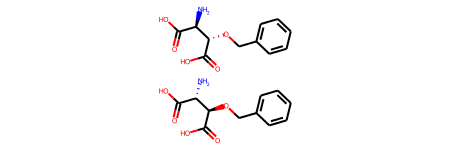

In [4676]:
M1 = mol_list [0]
M1

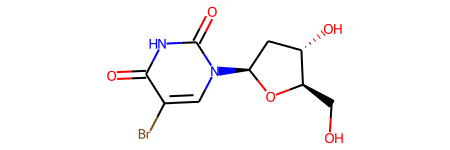

In [4677]:
M2 = mol_list [1]
M2

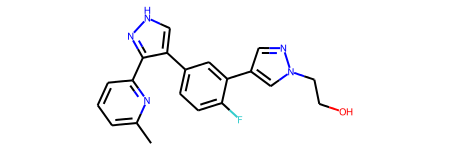

In [4678]:
M3 = mol_list [2]
M3

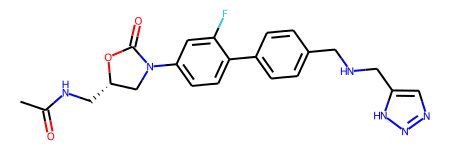

In [4679]:
M4 = mol_list [3]
M4

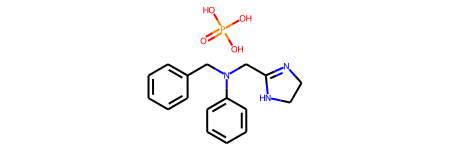

In [4680]:
M5 = mol_list [4]
M5

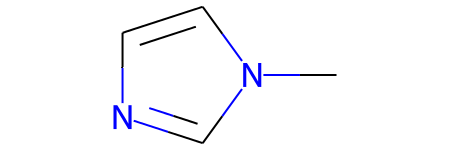

In [4681]:
M6 = mol_list [5]
M6

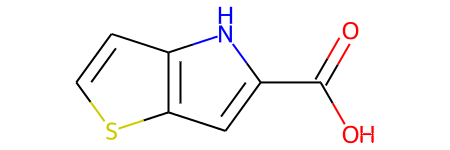

In [4682]:
M7 = mol_list [6]
M7

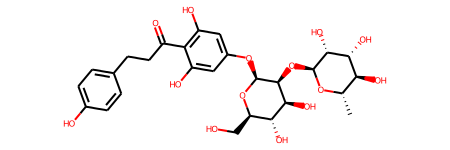

In [4683]:
M8 = mol_list [7]
M8

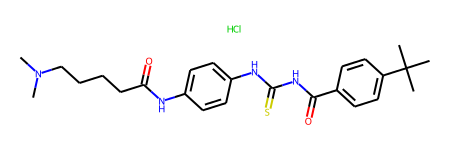

In [4684]:
M9 = mol_list [8]
M9

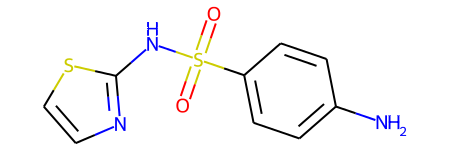

In [4685]:
M10 = mol_list [9]
M10

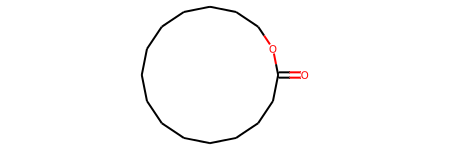

In [4686]:
M11 = mol_list [10]
M11

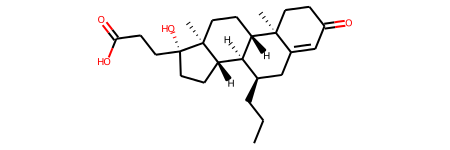

In [4687]:
M12 = mol_list [11]
M12

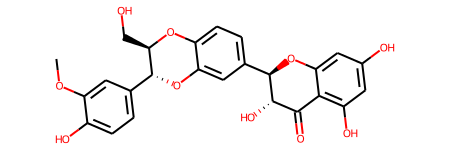

In [4688]:
M13 = mol_list [12]
M13

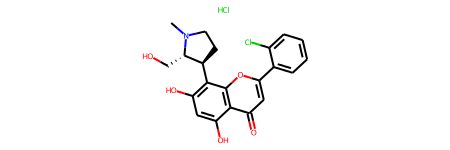

In [4689]:
M14 = mol_list [13]
M14

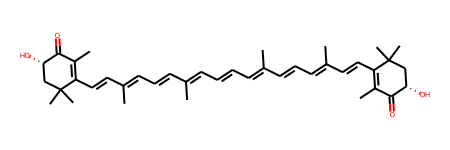

In [4690]:
M15 = mol_list [14]
M15

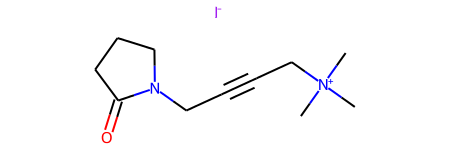

In [4691]:
M16 = mol_list [15]
M16

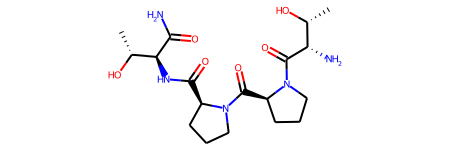

In [4692]:
M17 = mol_list [16]
M17

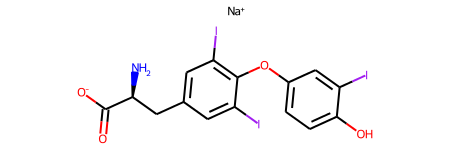

In [4693]:
M18 = mol_list [17]
M18

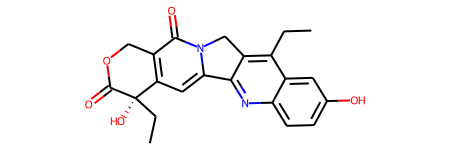

In [4694]:
M19 = mol_list [18]
M19

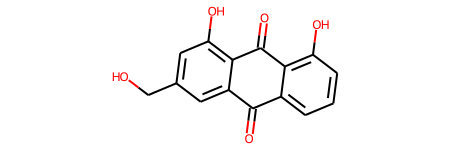

In [4695]:
M20 = mol_list [19]
M20

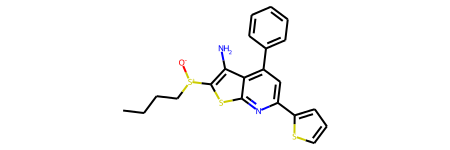

In [4696]:
M21 = mol_list [20]
M21

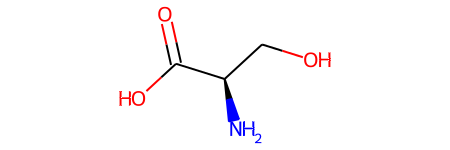

In [4697]:
M22 = mol_list [21]
M22

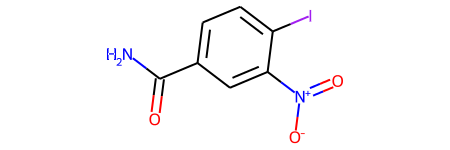

In [4698]:
M23 = mol_list [22]
M23

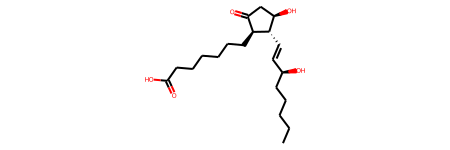

In [4699]:
M24 = mol_list [23]
M24

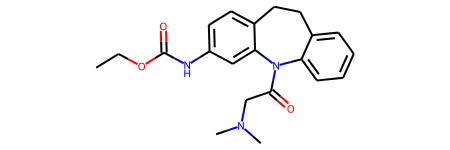

In [4700]:
M25 = mol_list [24]
M25

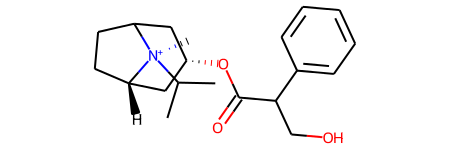

In [4701]:
M26 = mol_list [25]
M26

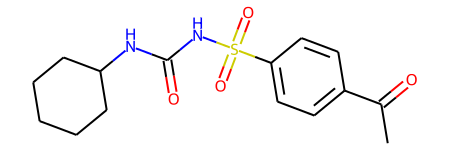

In [4702]:
M27 = mol_list [26]
M27

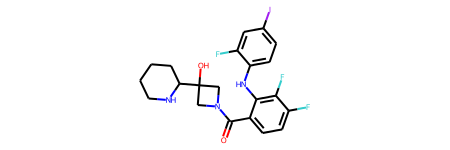

In [4703]:
M28 = mol_list [27]
M28

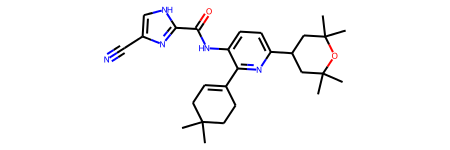

In [4704]:
M29 = mol_list [28]
M29

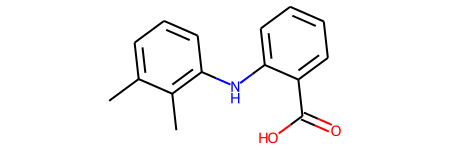

In [4705]:
M30 = mol_list [29]
M30

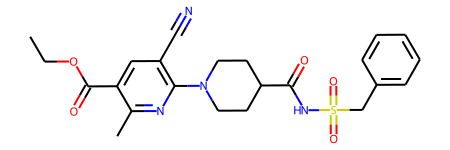

In [4706]:
M31 = mol_list [30]
M31

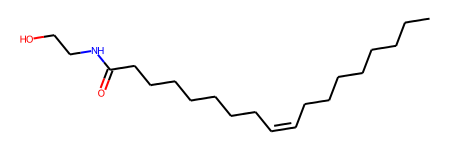

In [4707]:
M32 = mol_list [31]
M32

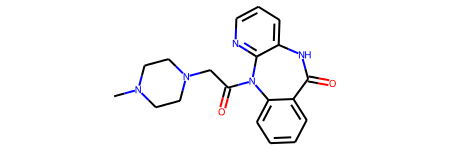

In [4708]:
M33 = mol_list [32]
M33

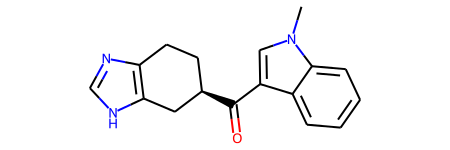

In [4709]:
M34 = mol_list [33]
M34

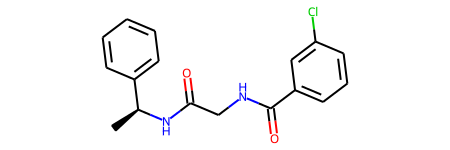

In [4710]:
M35 = mol_list [34]
M35

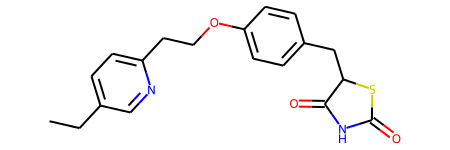

In [4711]:
M36 = mol_list [35]
M36

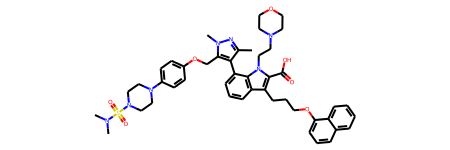

In [4712]:
M37= mol_list [36]
M37

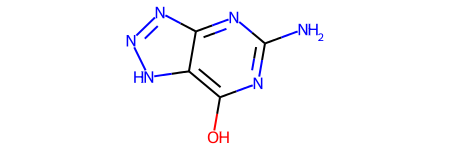

In [4713]:
M38= mol_list [37]
M38

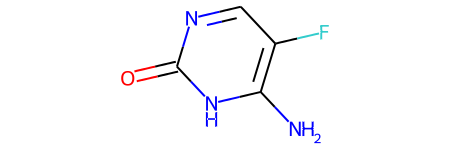

In [4714]:
M39= mol_list [38]
M39

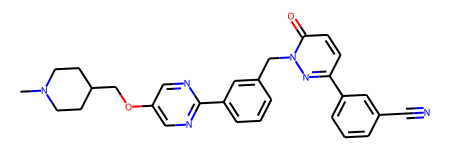

In [4715]:
M40= mol_list [39]
M40

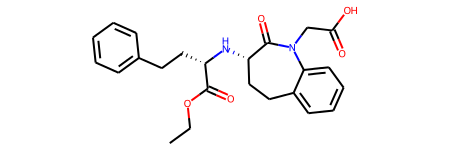

In [4716]:
M41= mol_list [40]
M41

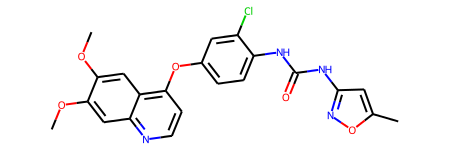

In [4717]:
M42= mol_list [41]
M42

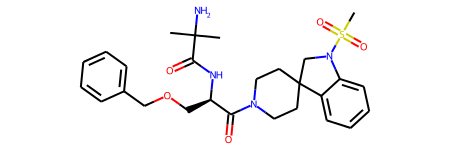

In [4718]:
M43= mol_list [42]
M43

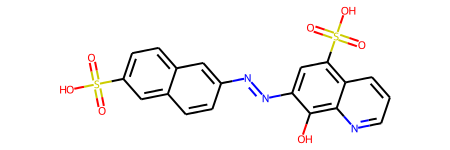

In [4719]:
M44= mol_list [43]
M44

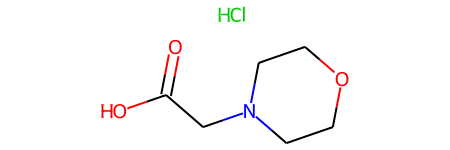

In [4720]:
M45= mol_list [44]
M45

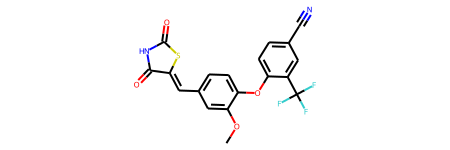

In [4721]:
M46= mol_list [45]
M46

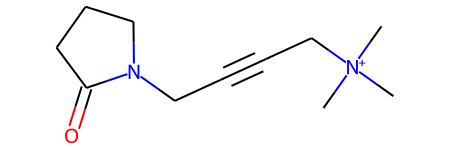

In [4722]:
M47= mol_list [46]
M47

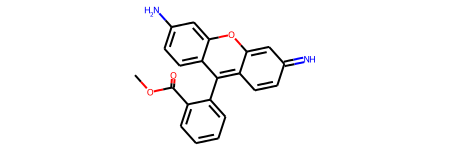

In [4723]:
M48= mol_list [47]
M48

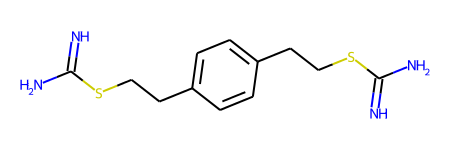

In [4724]:
M49= mol_list [48]
M49

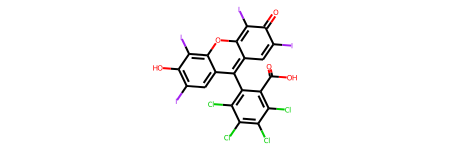

In [4725]:
M50= mol_list [49]
M50

In [4726]:
bi = {}

fp= AllChem.GetMorganFingerprintAsBitVect(M1, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[1,
 36,
 42,
 64,
 80,
 115,
 147,
 175,
 289,
 316,
 356,
 389,
 391,
 650,
 675,
 695,
 726,
 727,
 730,
 745,
 786,
 807,
 820,
 849,
 893,
 976,
 1004,
 1018]

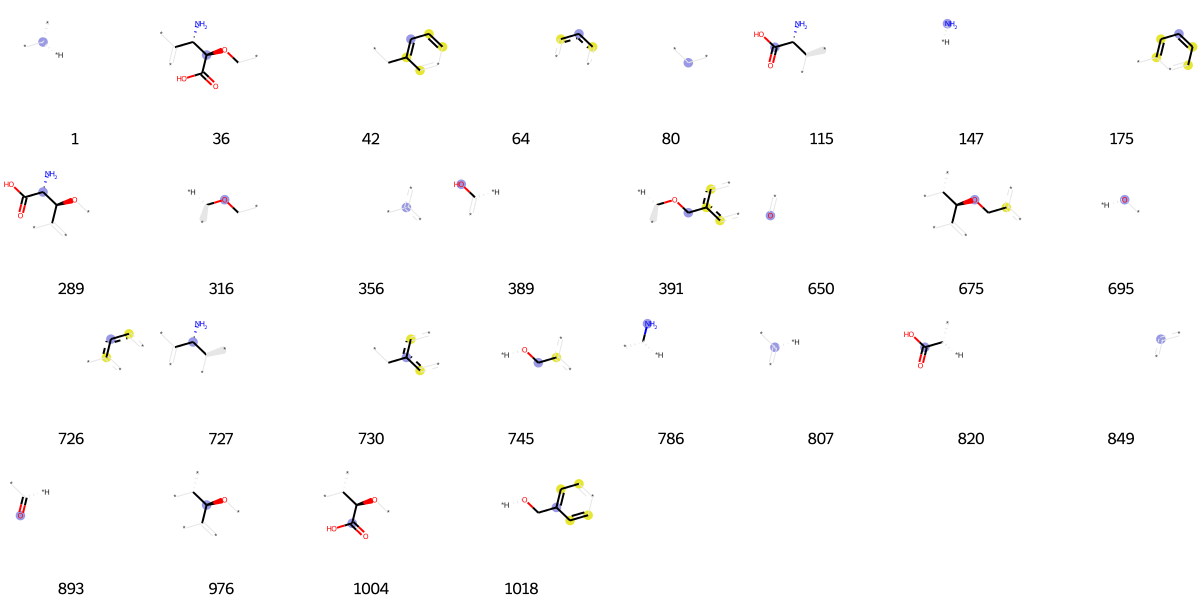

In [4727]:
prints = [(M1, x, bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp.GetOnBits ()])

In [4728]:
bi = {}

fp2= AllChem.GetMorganFingerprintAsBitVect(M2, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp2, fp_arr)
np.nonzero(fp_arr)
list(fp2.GetOnBits())

[4,
 80,
 90,
 107,
 222,
 233,
 240,
 268,
 314,
 356,
 377,
 439,
 445,
 464,
 492,
 502,
 577,
 601,
 605,
 607,
 610,
 650,
 656,
 721,
 728,
 740,
 750,
 758,
 795,
 807,
 833,
 849,
 896,
 897,
 926,
 935,
 970,
 1019]

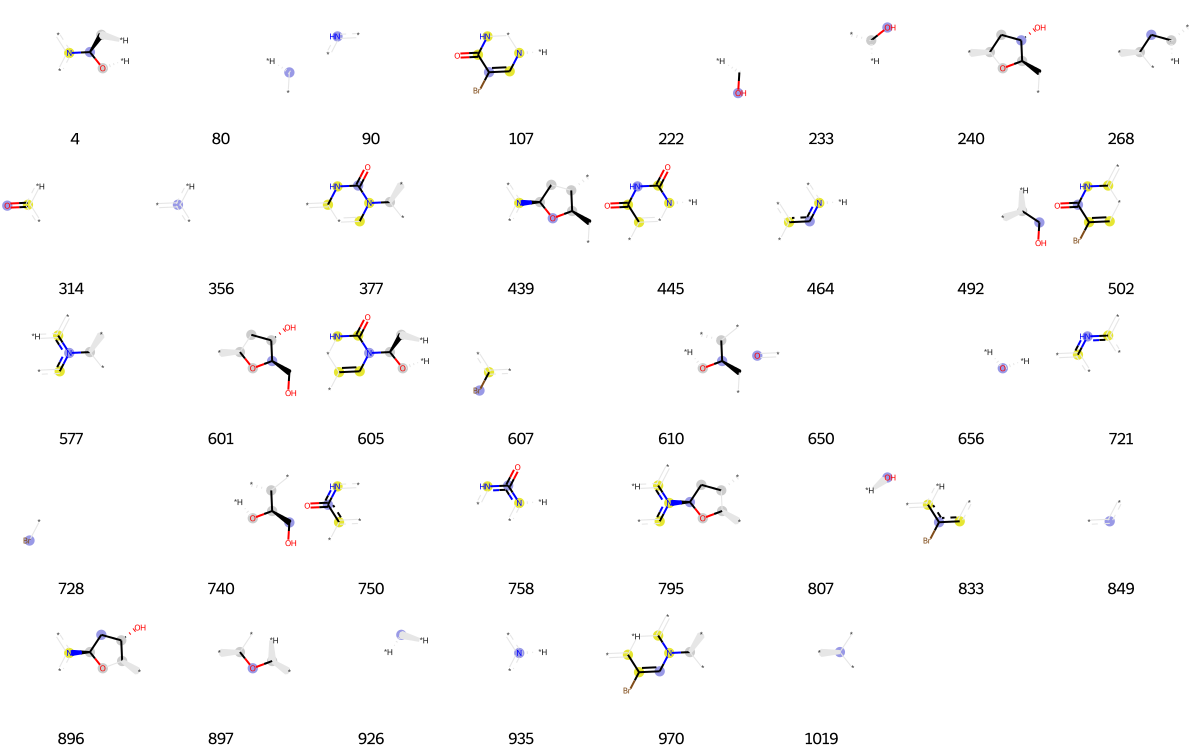

In [4729]:
prints = [(M2, x, bi) for x in fp2.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp2.GetOnBits ()])

In [4730]:
bi = {}

fp3= AllChem.GetMorganFingerprintAsBitVect(M3, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp3, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[15,
 33,
 43,
 57,
 64,
 80,
 90,
 121,
 136,
 179,
 197,
 200,
 205,
 209,
 216,
 222,
 260,
 323,
 352,
 356,
 378,
 394,
 451,
 464,
 473,
 511,
 560,
 617,
 695,
 698,
 699,
 707,
 726,
 747,
 807,
 811,
 815,
 816,
 827,
 831,
 849,
 855,
 873,
 875,
 880,
 896,
 904,
 935,
 936,
 940,
 980,
 984]

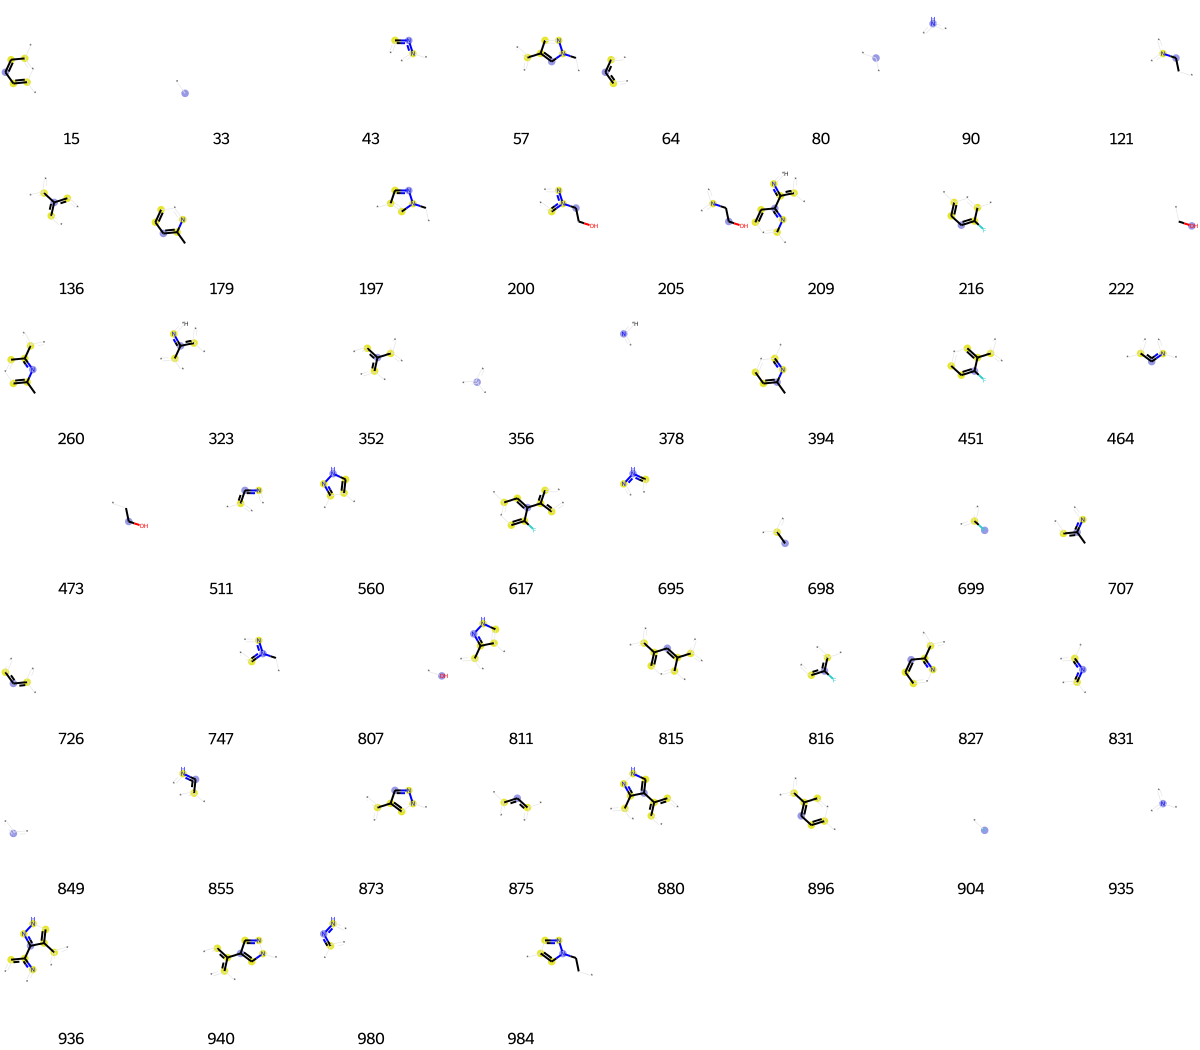

In [4731]:
prints = [(M3, x, bi) for x in fp3.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp3.GetOnBits ()])

In [4732]:
bi = {}

fp4= AllChem.GetMorganFingerprintAsBitVect(M4, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp4, fp_arr)
np.nonzero(fp_arr)
list(fp4.GetOnBits())

[33,
 65,
 74,
 80,
 83,
 90,
 99,
 119,
 128,
 134,
 136,
 190,
 197,
 222,
 233,
 239,
 245,
 255,
 268,
 281,
 310,
 314,
 352,
 356,
 367,
 378,
 407,
 433,
 449,
 511,
 533,
 580,
 606,
 608,
 617,
 638,
 650,
 656,
 680,
 699,
 716,
 726,
 730,
 731,
 739,
 750,
 781,
 801,
 807,
 816,
 849,
 872,
 875,
 892,
 893,
 896,
 904,
 922,
 926,
 935,
 952,
 954,
 969,
 1004,
 1017,
 1019]

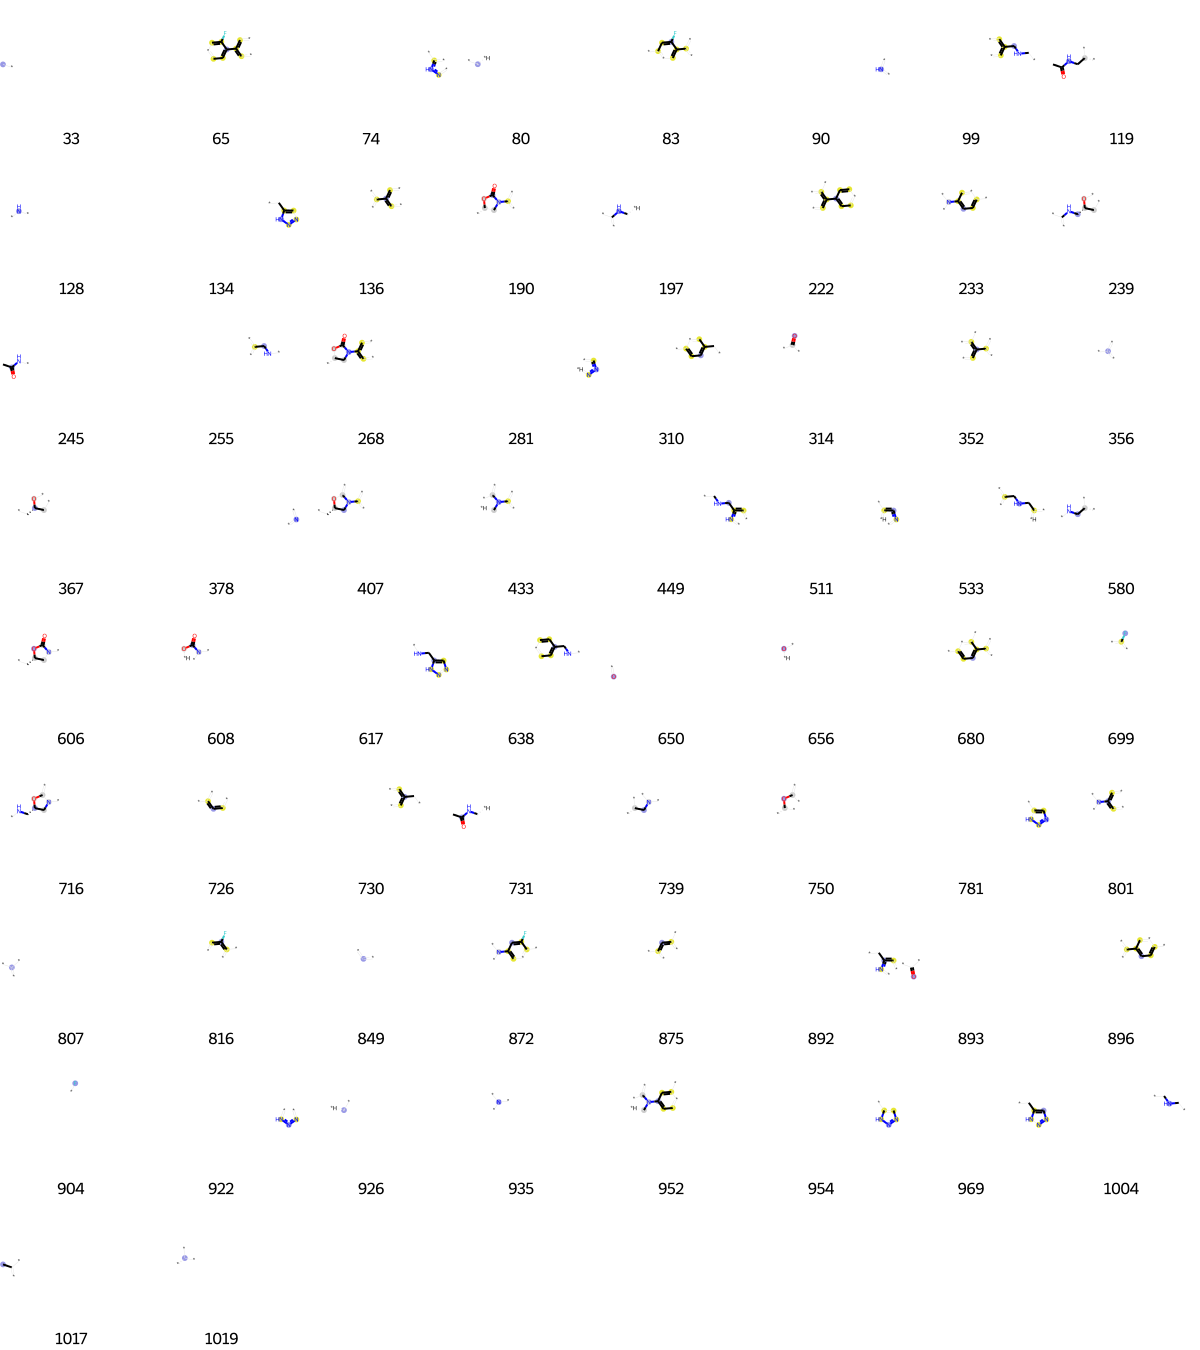

In [4733]:
prints = [(M4, x, bi) for x in fp4.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp4.GetOnBits ()])

In [4734]:
bi = {}

fp5= AllChem.GetMorganFingerprintAsBitVect(M5, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp5, fp_arr)
np.nonzero(fp_arr)
list(fp5.GetOnBits())

[42,
 49,
 53,
 64,
 72,
 80,
 89,
 90,
 123,
 175,
 192,
 280,
 288,
 305,
 313,
 356,
 378,
 389,
 486,
 507,
 609,
 639,
 650,
 663,
 696,
 711,
 726,
 730,
 807,
 814,
 836,
 842,
 849,
 872,
 881,
 906,
 926]

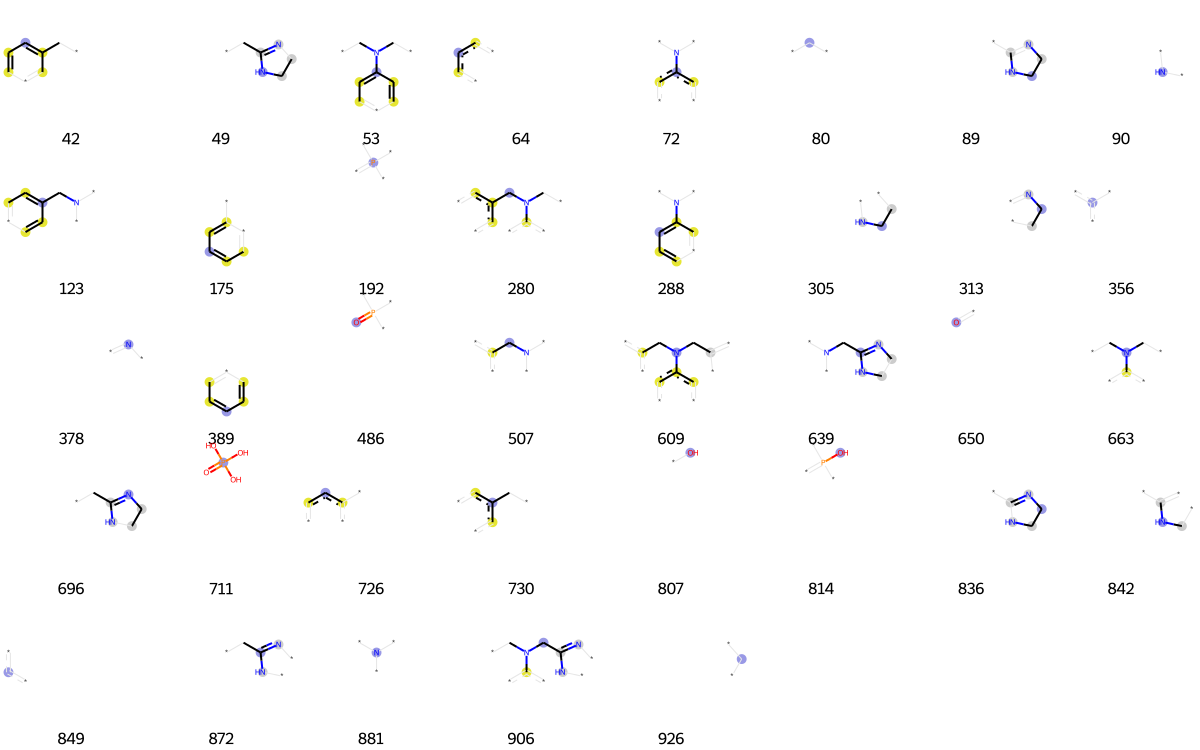

In [4735]:
prints = [(M5, x, bi) for x in fp5.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp5.GetOnBits ()])

In [4736]:
bi = {}

fp6= AllChem.GetMorganFingerprintAsBitVect(M6, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp6, fp_arr)
np.nonzero(fp_arr)
list(fp6.GetOnBits())

[33, 77, 121, 129, 316, 378, 579, 630, 631, 842, 843, 849, 932, 935, 950]

/usr/local/lib/python3.7/dist-packages/IPython/core/displayhook.py:260: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


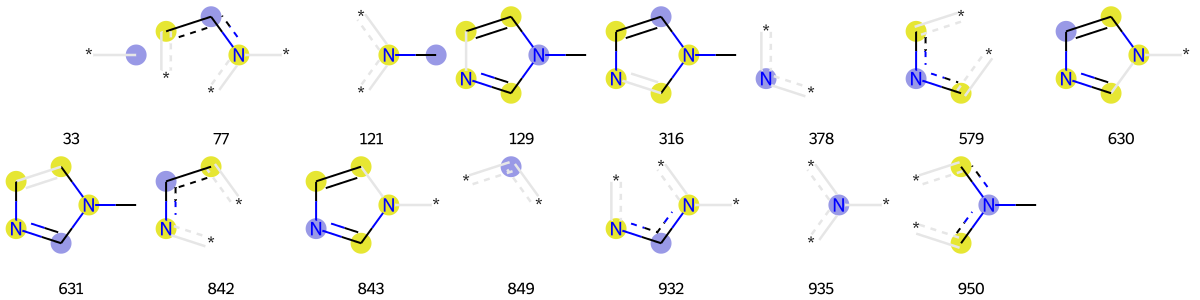

In [4737]:
prints = [(M6, x, bi) for x in fp6.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp6.GetOnBits ()])

In [4738]:
bi = {}

fp7= AllChem.GetMorganFingerprintAsBitVect(M7, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp7, fp_arr)
np.nonzero(fp_arr)
list(fp7.GetOnBits())

[14,
 68,
 90,
 102,
 119,
 143,
 356,
 389,
 440,
 456,
 468,
 543,
 554,
 607,
 650,
 675,
 721,
 726,
 807,
 817,
 849,
 875,
 885,
 893,
 921]

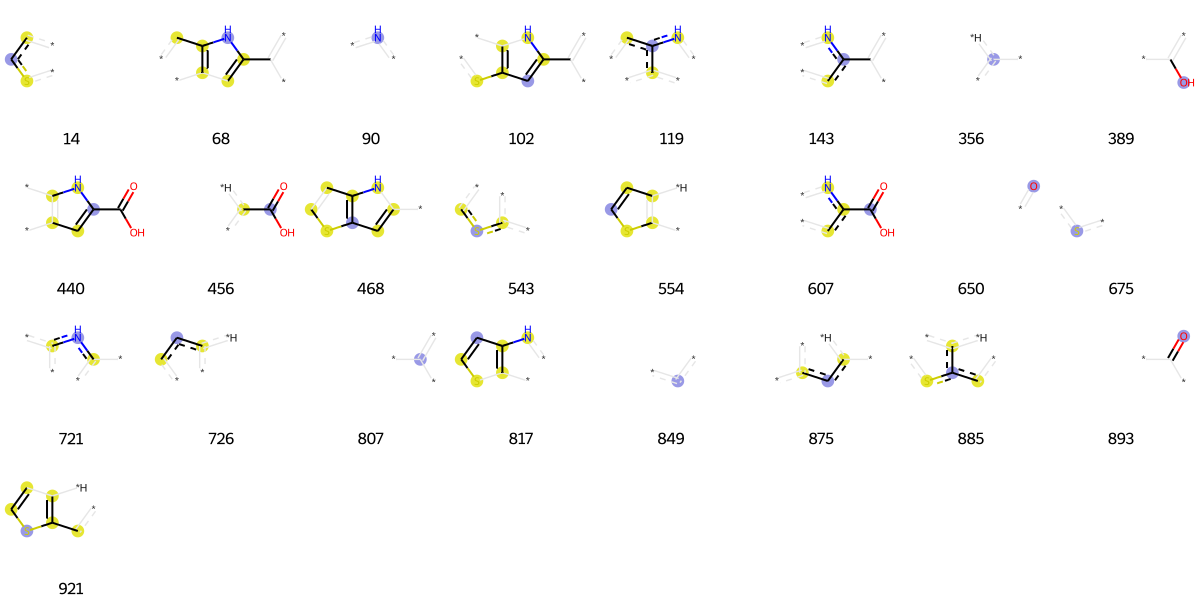

In [4739]:
prints = [(M7, x, bi) for x in fp7.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp7.GetOnBits ()])

In [4740]:
bi = {}

fp8= AllChem.GetMorganFingerprintAsBitVect(M8, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp8, fp_arr)
np.nonzero(fp_arr)
list(fp8.GetOnBits())

[13,
 21,
 33,
 53,
 66,
 73,
 80,
 210,
 219,
 222,
 233,
 285,
 289,
 299,
 310,
 322,
 356,
 357,
 432,
 437,
 463,
 489,
 492,
 524,
 540,
 550,
 556,
 576,
 578,
 583,
 586,
 610,
 650,
 656,
 669,
 695,
 722,
 726,
 730,
 740,
 745,
 754,
 772,
 781,
 807,
 819,
 820,
 849,
 869,
 871,
 875,
 893,
 897,
 926,
 942,
 953,
 975,
 1019]

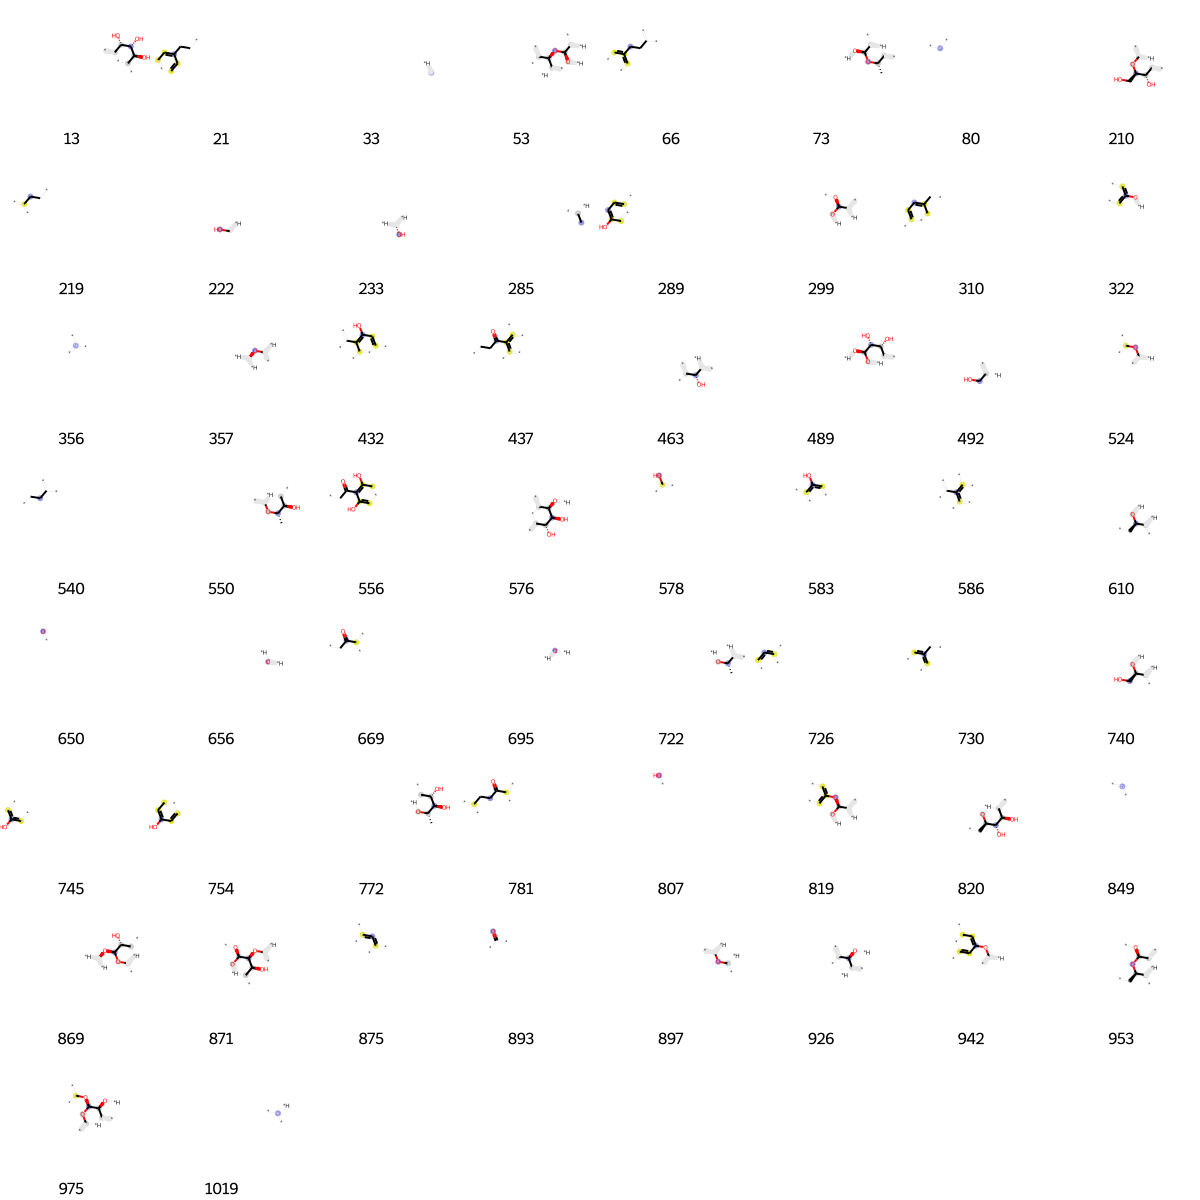

In [4741]:
prints = [(M8, x, bi) for x in fp8.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp8.GetOnBits ()])


In [4742]:
bi = {}

fp9= AllChem.GetMorganFingerprintAsBitVect(M9, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp9, fp_arr)
np.nonzero(fp_arr)
list(fp9.GetOnBits())

[33,
 41,
 53,
 80,
 95,
 97,
 110,
 114,
 128,
 139,
 191,
 243,
 315,
 356,
 358,
 361,
 392,
 393,
 412,
 486,
 514,
 518,
 532,
 540,
 641,
 645,
 650,
 652,
 673,
 693,
 694,
 726,
 792,
 807,
 841,
 843,
 849,
 881,
 887,
 893,
 901,
 927,
 930,
 936,
 946]

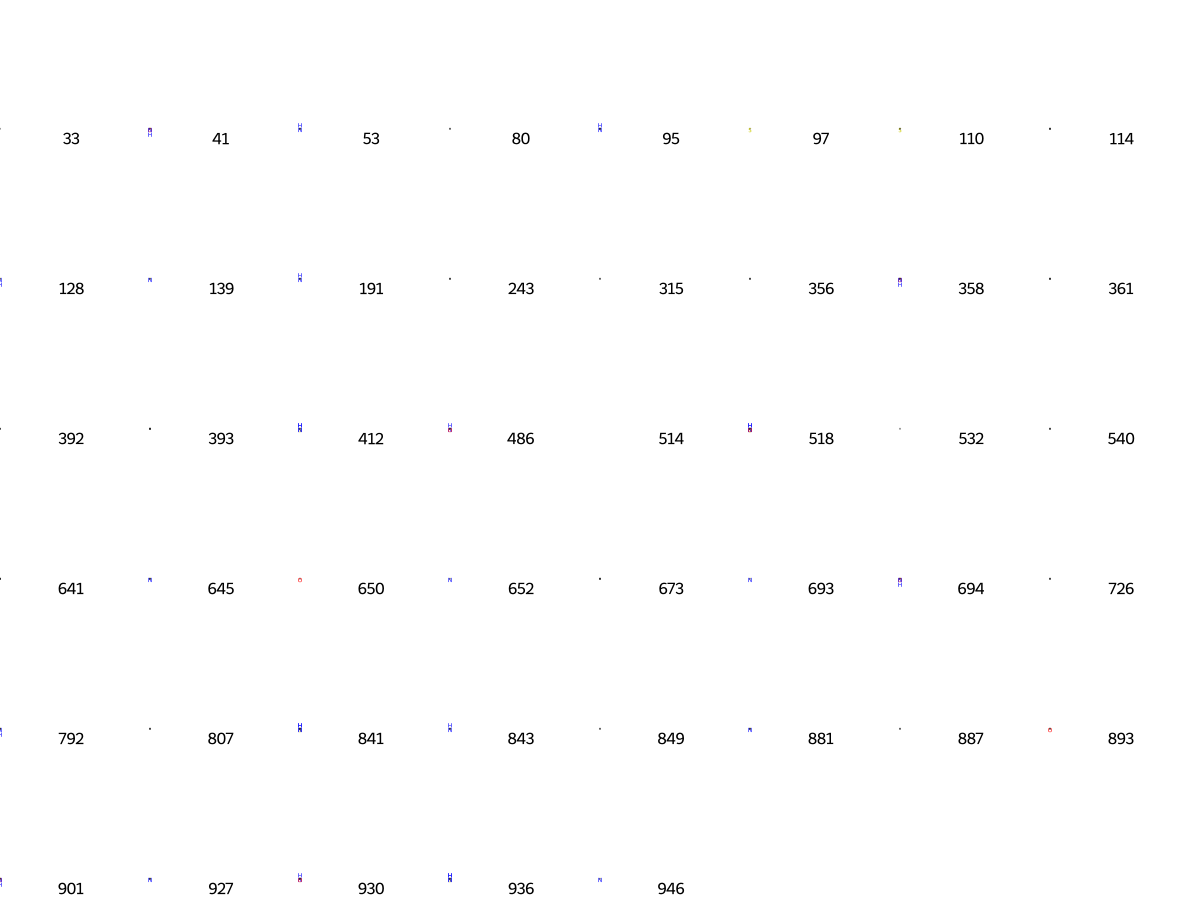

In [4743]:
prints = [(M9, x, bi) for x in fp9.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp9.GetOnBits ()])

In [4744]:
bi = {}

fp10= AllChem.GetMorganFingerprintAsBitVect(M10, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp10, fp_arr)
np.nonzero(fp_arr)
list(fp10.GetOnBits())

[4,
 14,
 61,
 128,
 144,
 147,
 246,
 307,
 319,
 350,
 356,
 378,
 385,
 428,
 433,
 452,
 479,
 501,
 502,
 543,
 554,
 650,
 675,
 715,
 726,
 780,
 842,
 849,
 883,
 888,
 905]

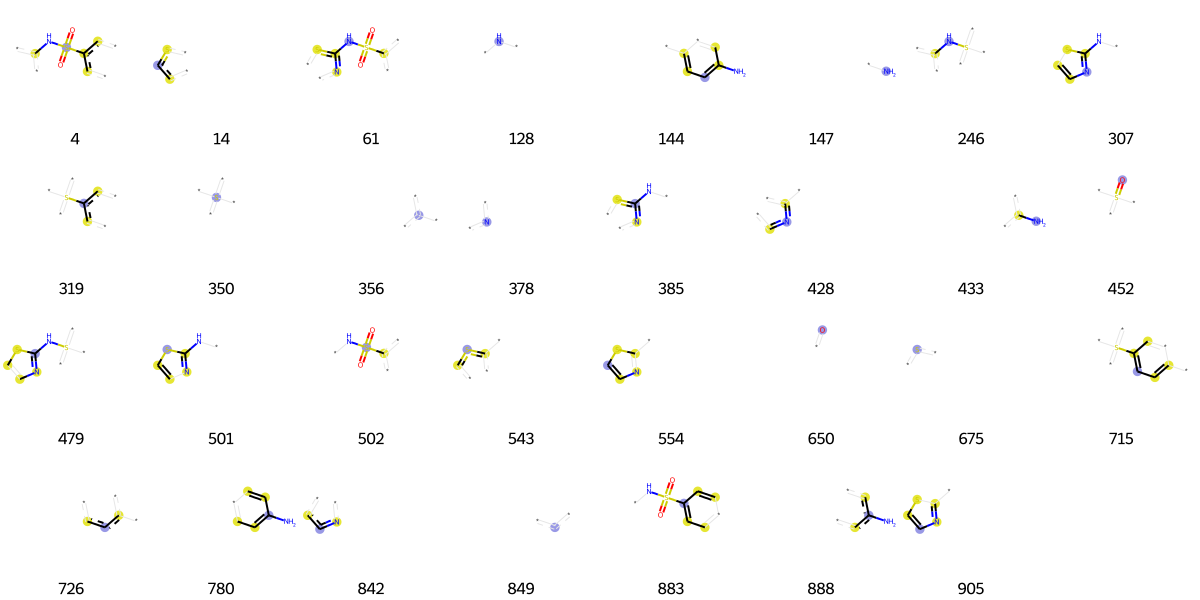

In [4745]:
prints = [(M10, x, bi) for x in fp10.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp10.GetOnBits ()])

In [4746]:
bi = {}

fp11= AllChem.GetMorganFingerprintAsBitVect(M11, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp11, fp_arr)
np.nonzero(fp_arr)
list(fp11.GetOnBits())

[2,
 4,
 110,
 225,
 310,
 314,
 356,
 441,
 643,
 650,
 656,
 685,
 714,
 881,
 926,
 950,
 970]

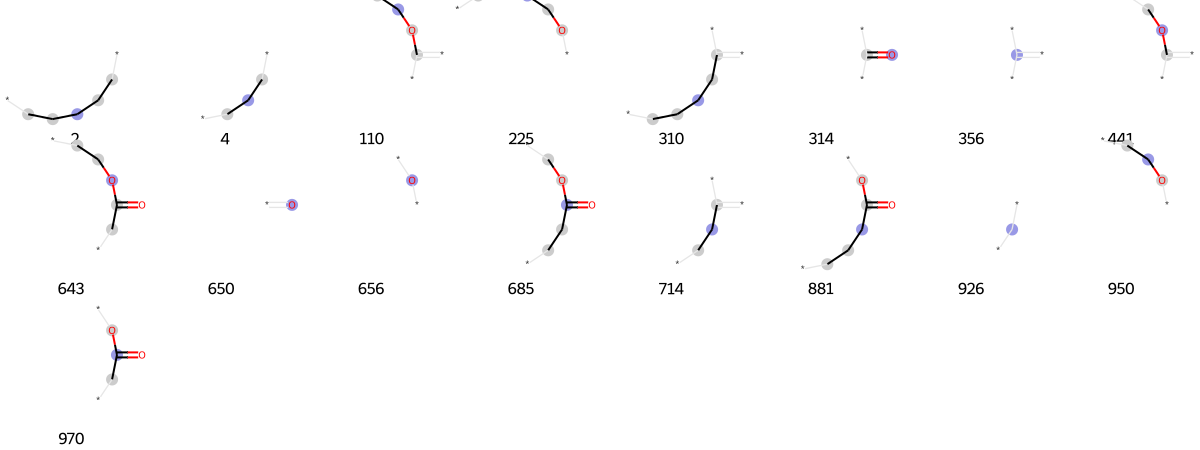

In [4747]:
prints = [(M11, x, bi) for x in fp11.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp11.GetOnBits ()])

In [4748]:
bi = {}

fp12= AllChem.GetMorganFingerprintAsBitVect(M12, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp12, fp_arr)
np.nonzero(fp_arr)
list(fp12.GetOnBits())

[11,
 16,
 33,
 36,
 80,
 84,
 88,
 105,
 130,
 138,
 203,
 226,
 231,
 242,
 250,
 262,
 263,
 284,
 288,
 294,
 298,
 301,
 314,
 356,
 359,
 389,
 412,
 456,
 479,
 504,
 519,
 529,
 533,
 540,
 555,
 579,
 649,
 650,
 713,
 714,
 794,
 795,
 807,
 832,
 833,
 841,
 849,
 854,
 860,
 893,
 926,
 964,
 1019]

In [4749]:
bi = {}

fp13= AllChem.GetMorganFingerprintAsBitVect(M13, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp13, fp_arr)
np.nonzero(fp_arr)
list(fp13.GetOnBits())

[5,
 11,
 31,
 33,
 63,
 64,
 80,
 87,
 144,
 157,
 164,
 167,
 222,
 227,
 233,
 249,
 255,
 276,
 277,
 314,
 356,
 416,
 451,
 457,
 492,
 512,
 513,
 578,
 583,
 585,
 588,
 602,
 610,
 614,
 650,
 656,
 695,
 723,
 726,
 729,
 740,
 745,
 750,
 779,
 807,
 839,
 841,
 849,
 858,
 875,
 881,
 946,
 967,
 1019]

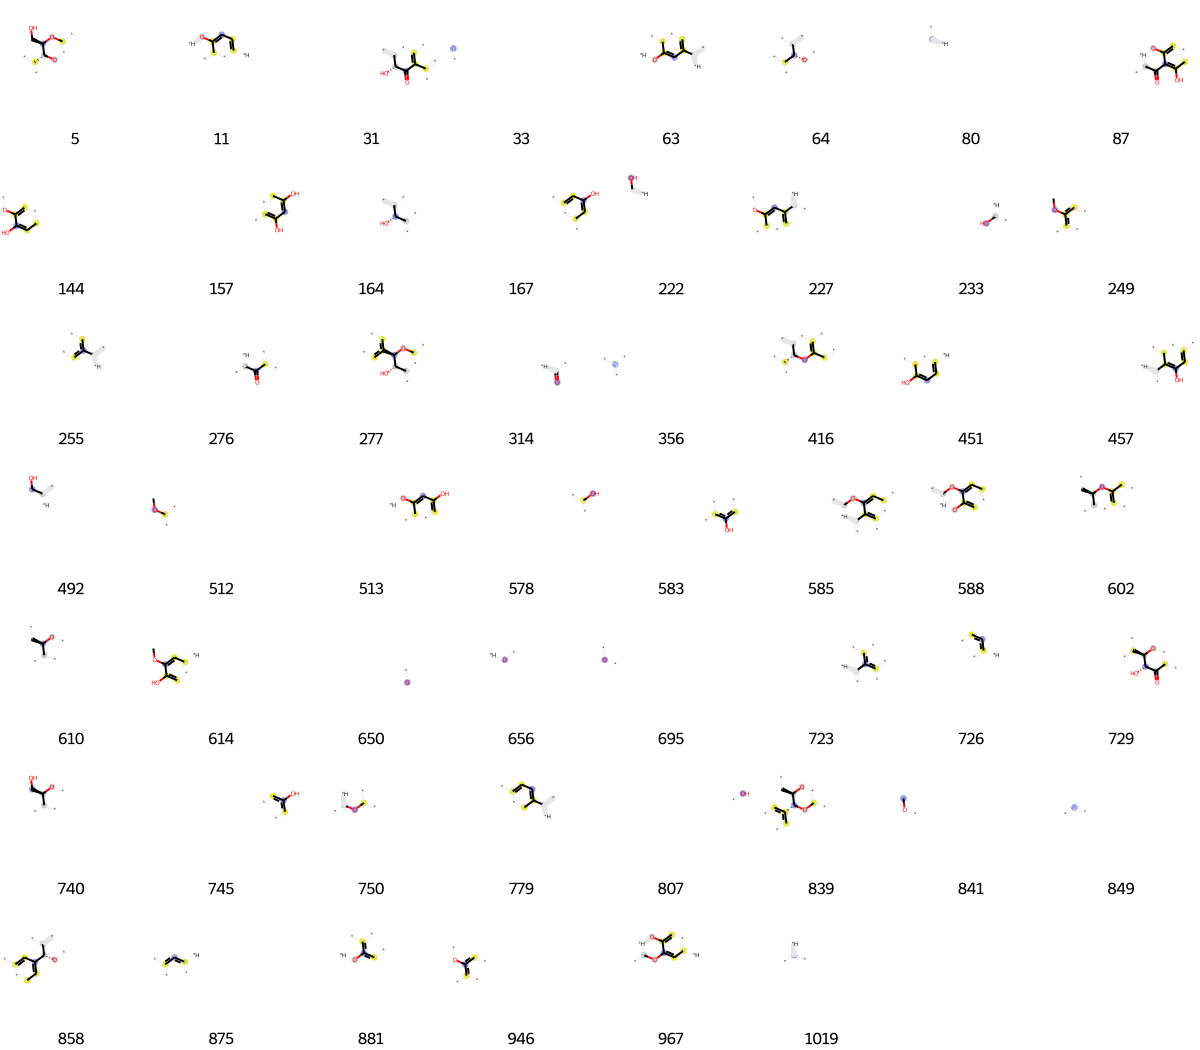

In [4750]:
prints = [(M13, x, bi) for x in fp13.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp13.GetOnBits ()])

In [4751]:
bi = {}

fp14= AllChem.GetMorganFingerprintAsBitVect(M14, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp14, fp_arr)
np.nonzero(fp_arr)
list(fp14.GetOnBits())

[33,
 54,
 64,
 80,
 107,
 121,
 133,
 154,
 175,
 183,
 210,
 222,
 301,
 314,
 332,
 352,
 356,
 366,
 455,
 456,
 476,
 486,
 492,
 514,
 561,
 578,
 580,
 583,
 596,
 621,
 624,
 650,
 656,
 659,
 666,
 695,
 726,
 760,
 807,
 823,
 847,
 849,
 875,
 911,
 920,
 926,
 935,
 955,
 960,
 974,
 984,
 992,
 1014,
 1019]

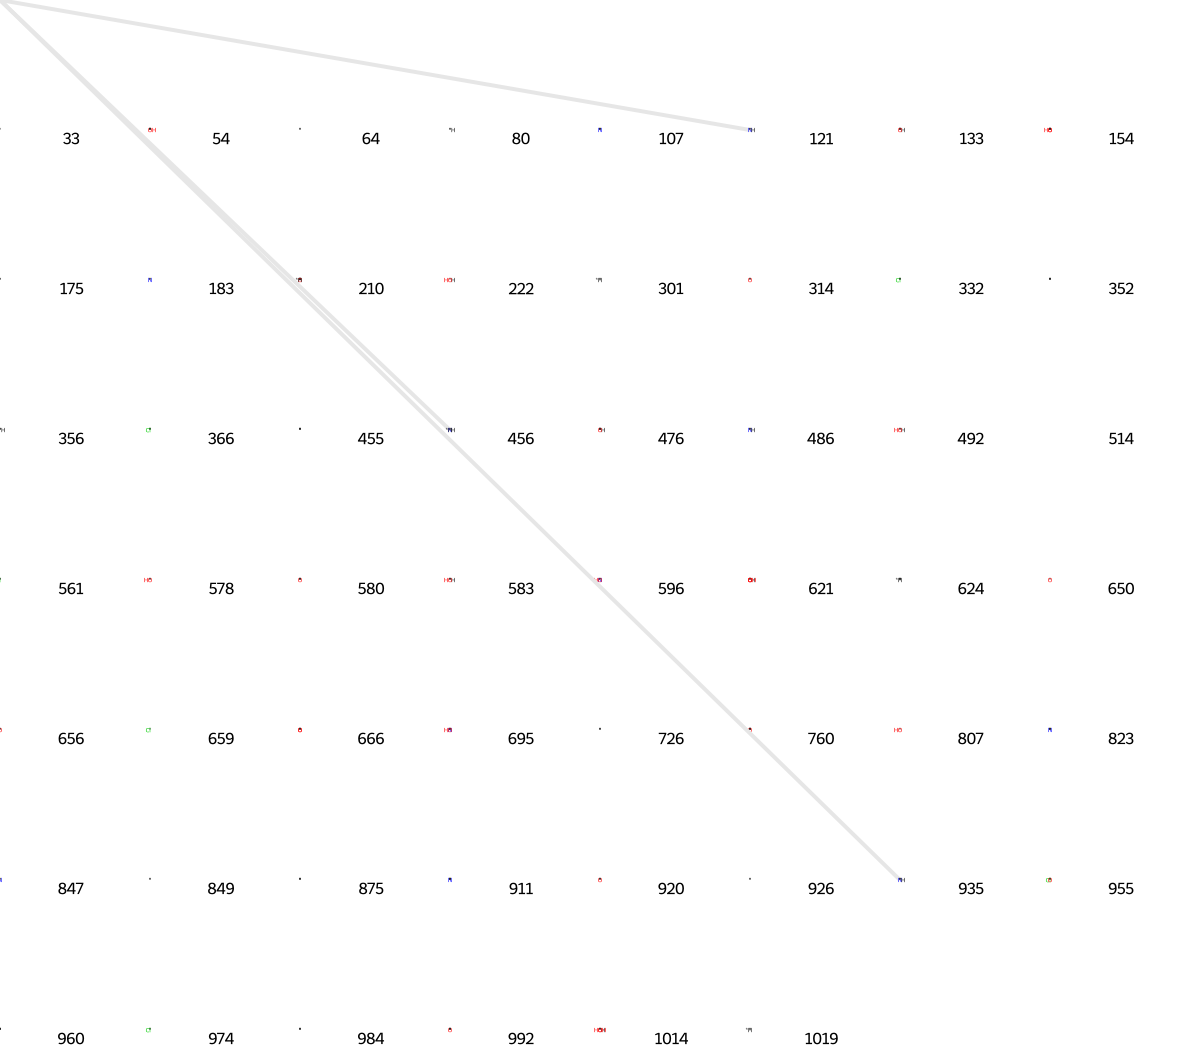

In [4752]:
prints = [(M14, x, bi) for x in fp14.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp14.GetOnBits ()])

In [4753]:
bi = {}

fp15= AllChem.GetMorganFingerprintAsBitVect(M15, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp15, fp_arr)
np.nonzero(fp_arr)
list(fp15.GetOnBits())

[31,
 33,
 36,
 55,
 56,
 69,
 84,
 173,
 233,
 250,
 251,
 259,
 264,
 276,
 295,
 314,
 332,
 356,
 432,
 491,
 602,
 618,
 619,
 650,
 679,
 694,
 698,
 718,
 807,
 835,
 891,
 926,
 933,
 936,
 953,
 1017,
 1019]

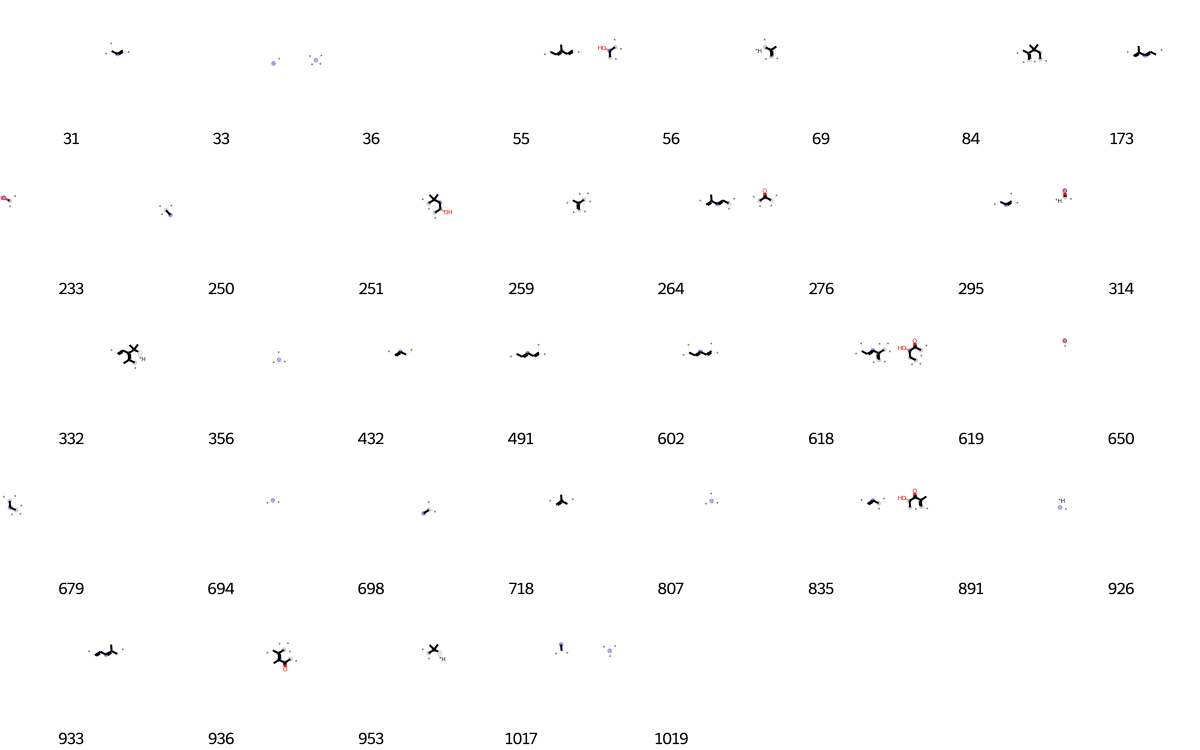

In [4754]:
prints = [(M15, x, bi) for x in fp15.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp15.GetOnBits ()])

In [4755]:
bi = {}

fp16= AllChem.GetMorganFingerprintAsBitVect(M16, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp16, fp_arr)
np.nonzero(fp_arr)
list(fp16.GetOnBits())

[4,
 33,
 65,
 80,
 99,
 114,
 151,
 158,
 191,
 257,
 314,
 319,
 320,
 356,
 414,
 419,
 456,
 507,
 544,
 583,
 628,
 650,
 673,
 674,
 714,
 735,
 787,
 798,
 926,
 935]

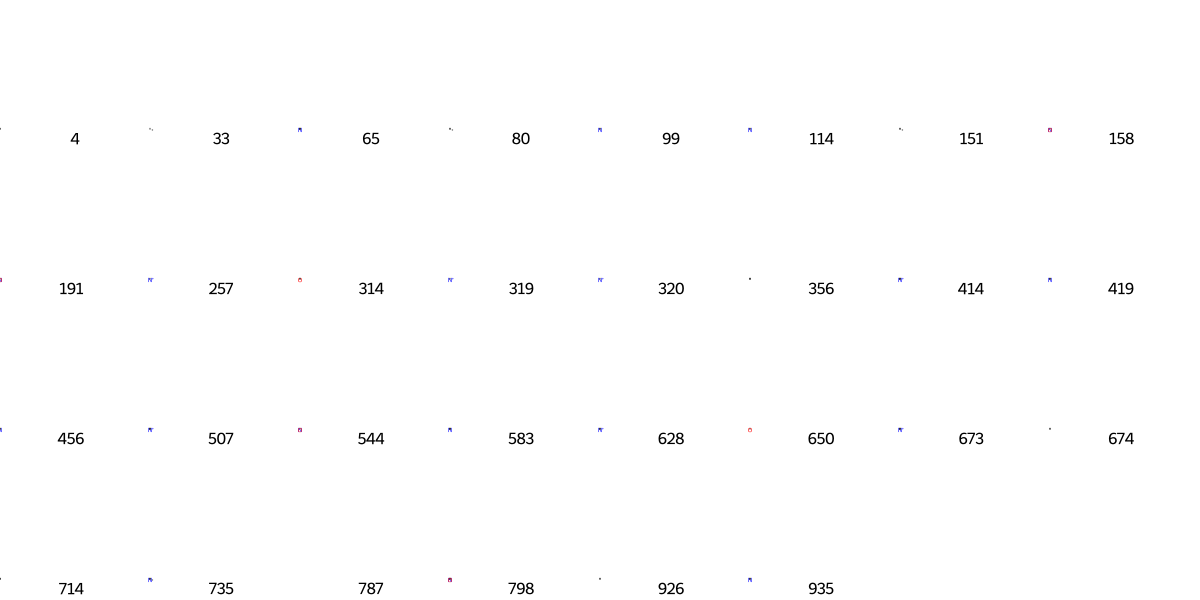

In [4756]:
prints = [(M16, x, bi) for x in fp16.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp16.GetOnBits ()])

In [4757]:
bi = {}

fp17= AllChem.GetMorganFingerprintAsBitVect(M17, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp17, fp_arr)
np.nonzero(fp_arr)
list(fp17.GetOnBits())

[1,
 4,
 33,
 94,
 108,
 117,
 128,
 140,
 143,
 147,
 188,
 193,
 227,
 242,
 244,
 283,
 301,
 354,
 378,
 418,
 442,
 446,
 456,
 462,
 488,
 511,
 520,
 531,
 597,
 624,
 650,
 669,
 689,
 711,
 716,
 727,
 786,
 807,
 833,
 893,
 926,
 935,
 1019]

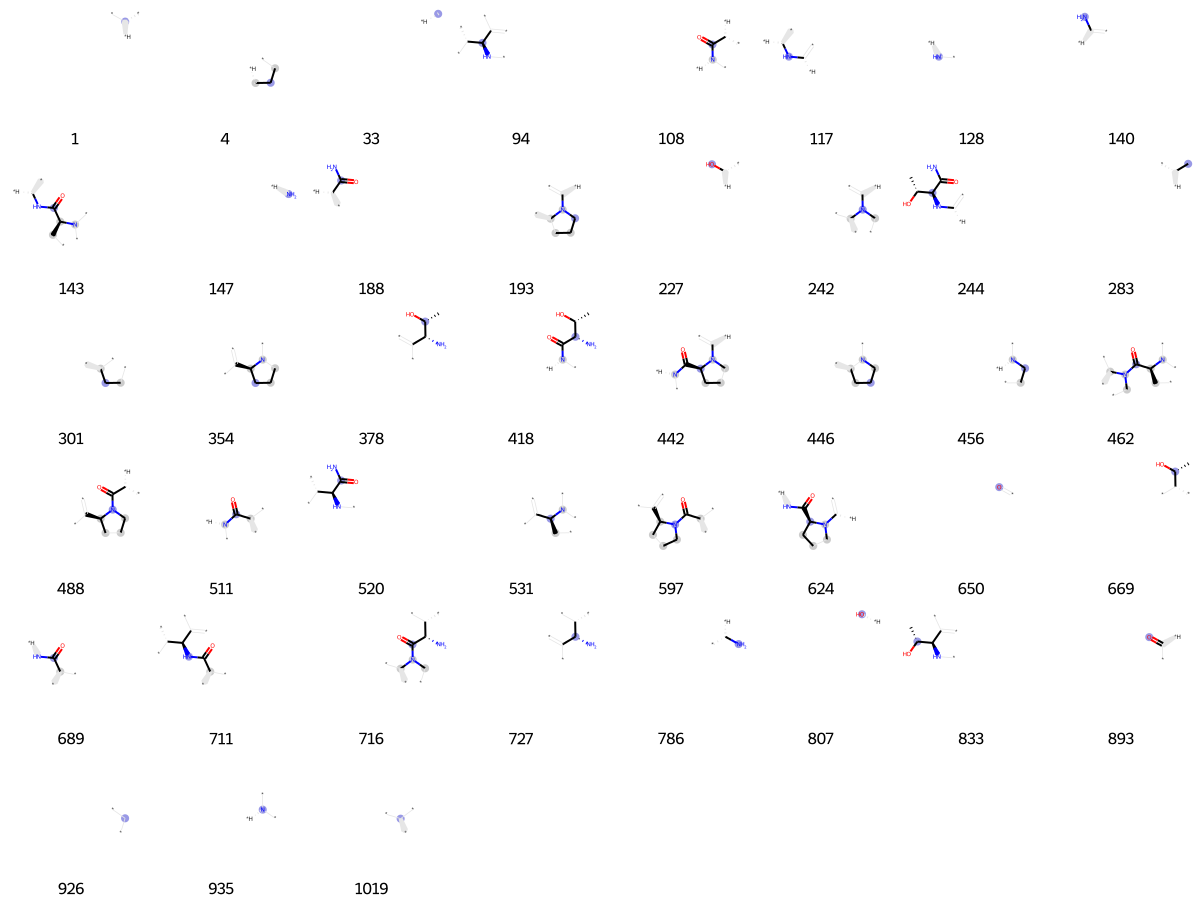

In [4758]:
prints = [(M17, x, bi) for x in fp17.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp17.GetOnBits ()])

In [4759]:
bi = {}

fp18= AllChem.GetMorganFingerprintAsBitVect(M18, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp18, fp_arr)
np.nonzero(fp_arr)
list(fp18.GetOnBits())

[0,
 1,
 79,
 80,
 147,
 189,
 202,
 290,
 322,
 333,
 346,
 356,
 384,
 387,
 451,
 457,
 473,
 578,
 582,
 583,
 593,
 614,
 618,
 650,
 661,
 695,
 715,
 718,
 726,
 730,
 731,
 739,
 786,
 807,
 825,
 849,
 875,
 893,
 936,
 947,
 1017]

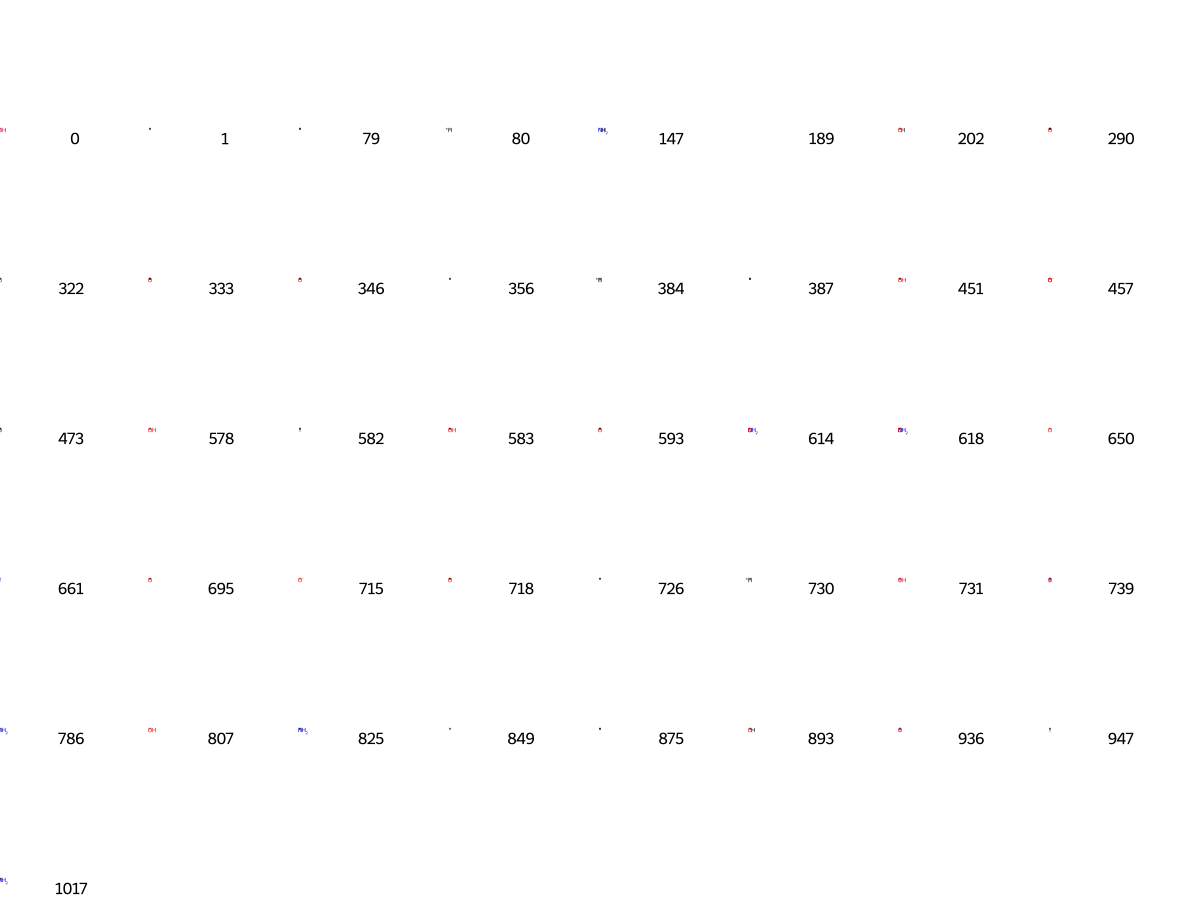

In [4760]:
prints = [(M18, x, bi) for x in fp18.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp18.GetOnBits ()])

In [4761]:
bi = {}

fp19= AllChem.GetMorganFingerprintAsBitVect(M19, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp19, fp_arr)
np.nonzero(fp_arr)
list(fp19.GetOnBits())

[33,
 36,
 73,
 80,
 97,
 111,
 130,
 189,
 233,
 248,
 268,
 289,
 294,
 314,
 323,
 327,
 333,
 356,
 361,
 369,
 375,
 378,
 381,
 387,
 389,
 392,
 441,
 472,
 504,
 541,
 578,
 609,
 650,
 656,
 657,
 668,
 706,
 726,
 745,
 762,
 767,
 775,
 794,
 807,
 831,
 849,
 856,
 875,
 922,
 926,
 935,
 943,
 956,
 961,
 1010,
 1011]

In [4762]:
bi = {}

fp20= AllChem.GetMorganFingerprintAsBitVect(M20, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp20, fp_arr)
np.nonzero(fp_arr)
list(fp20.GetOnBits())

[15,
 58,
 64,
 80,
 193,
 222,
 298,
 314,
 332,
 352,
 356,
 447,
 452,
 457,
 575,
 578,
 583,
 587,
 650,
 675,
 723,
 726,
 730,
 787,
 807,
 837,
 849,
 875,
 901,
 984]

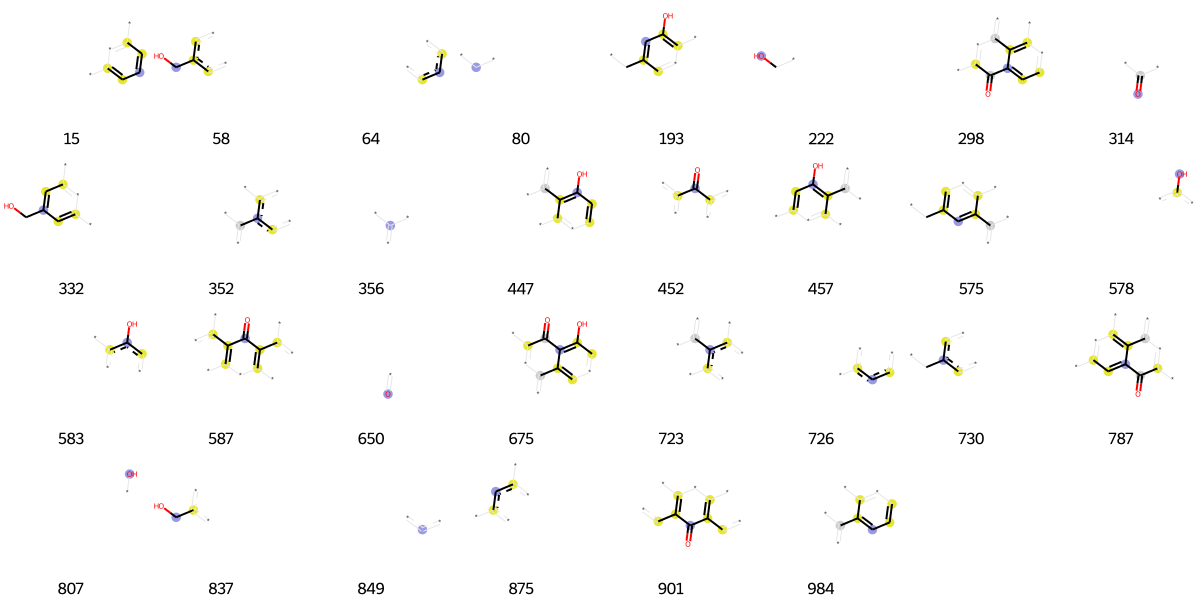

In [4763]:
prints = [(M20, x, bi) for x in fp20.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp20.GetOnBits ()])

In [4764]:
bi = {}

fp21= AllChem.GetMorganFingerprintAsBitVect(M21, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp21, fp_arr)
np.nonzero(fp_arr)
list(fp21.GetOnBits())

[14,
 32,
 33,
 62,
 64,
 80,
 136,
 147,
 162,
 175,
 209,
 222,
 225,
 241,
 257,
 275,
 289,
 294,
 318,
 341,
 352,
 356,
 362,
 378,
 383,
 389,
 406,
 417,
 433,
 474,
 511,
 537,
 543,
 554,
 568,
 591,
 675,
 715,
 726,
 736,
 766,
 775,
 794,
 814,
 818,
 831,
 849,
 858,
 875,
 887,
 960,
 980]

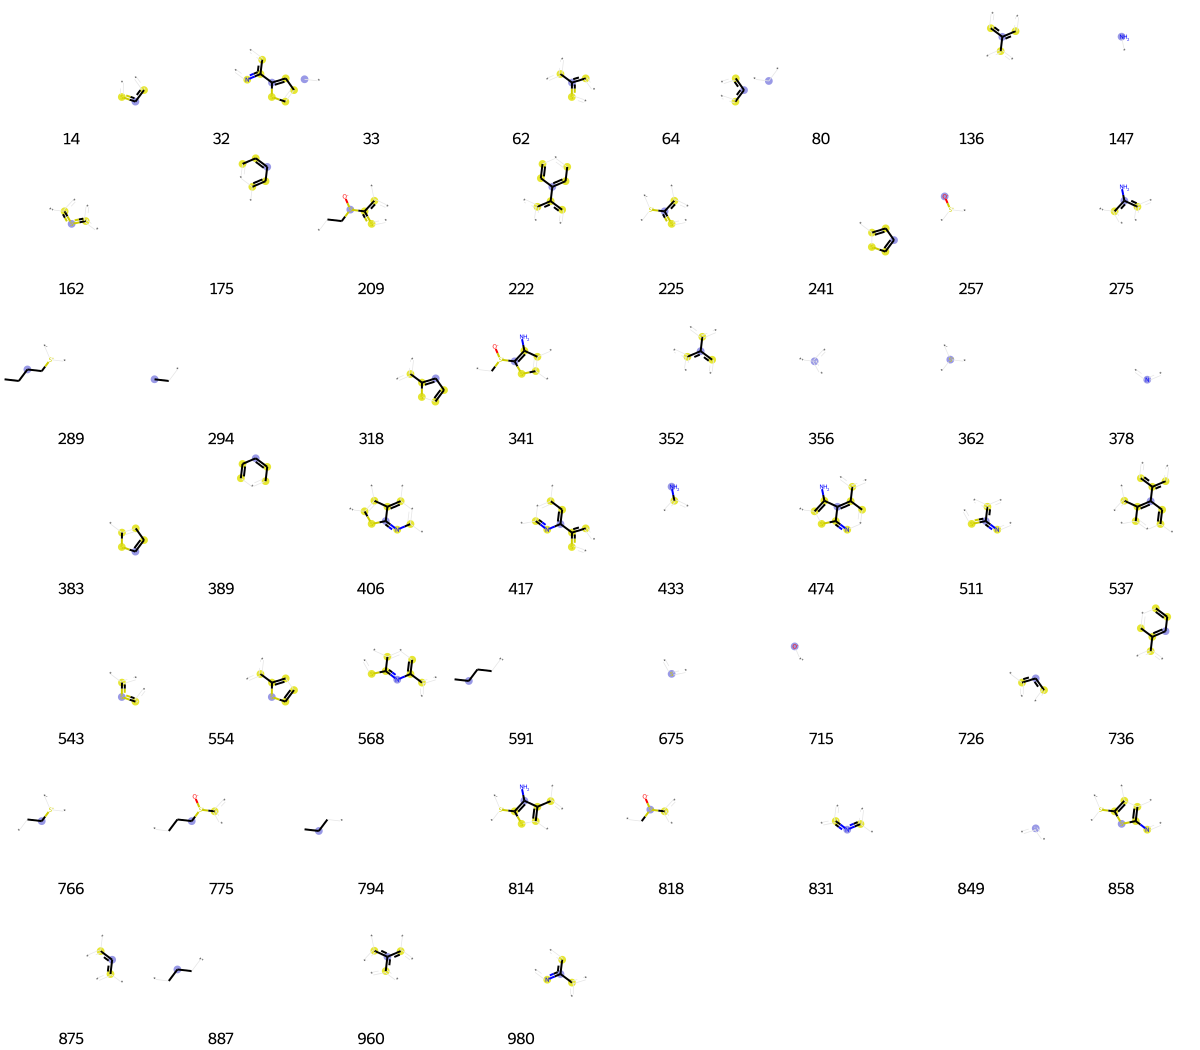

In [4765]:
prints = [(M21, x, bi) for x in fp21.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp21.GetOnBits ()])

In [4766]:
bi = {}

fp22= AllChem.GetMorganFingerprintAsBitVect(M22, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp22, fp_arr)
np.nonzero(fp_arr)
list(fp22.GetOnBits())

[1, 80, 147, 222, 244, 389, 403, 482, 650, 727, 786, 807, 820, 825, 893]

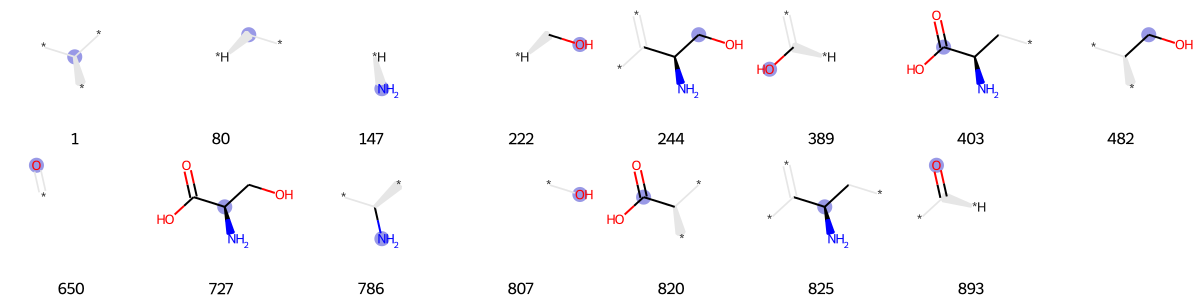

In [4767]:
prints = [(M22, x, bi) for x in fp22.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp22.GetOnBits ()])

In [4768]:
bi = {}

fp23= AllChem.GetMorganFingerprintAsBitVect(M23, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp23, fp_arr)
np.nonzero(fp_arr)
list(fp23.GetOnBits())

[87,
 102,
 140,
 147,
 171,
 261,
 309,
 311,
 354,
 356,
 361,
 582,
 650,
 661,
 673,
 692,
 703,
 715,
 716,
 726,
 753,
 807,
 838,
 849,
 875,
 893,
 939,
 947]

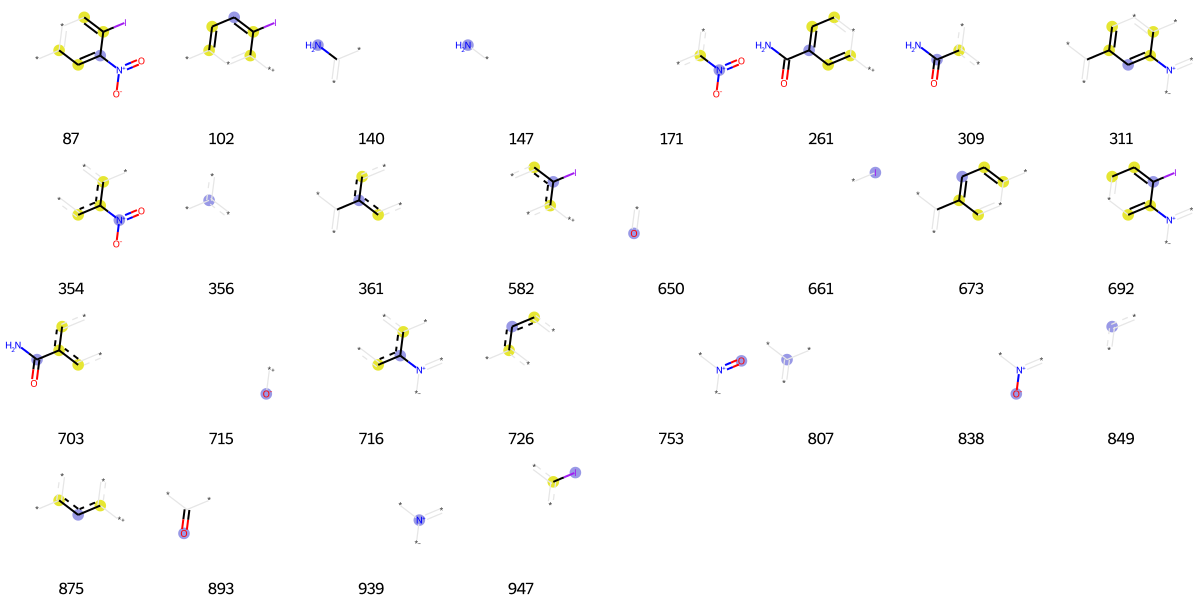

In [4769]:
prints = [(M23, x, bi) for x in fp23.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp23.GetOnBits ()])

In [4770]:
bi = {}

fp24= AllChem.GetMorganFingerprintAsBitVect(M24, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp24, fp_arr)
np.nonzero(fp_arr)
list(fp24.GetOnBits())

[1,
 33,
 80,
 86,
 119,
 142,
 189,
 204,
 227,
 231,
 233,
 243,
 259,
 263,
 294,
 314,
 334,
 356,
 370,
 389,
 420,
 540,
 549,
 575,
 591,
 600,
 628,
 650,
 656,
 694,
 713,
 717,
 737,
 739,
 782,
 794,
 796,
 807,
 832,
 849,
 887,
 893,
 926,
 989,
 1019,
 1023]

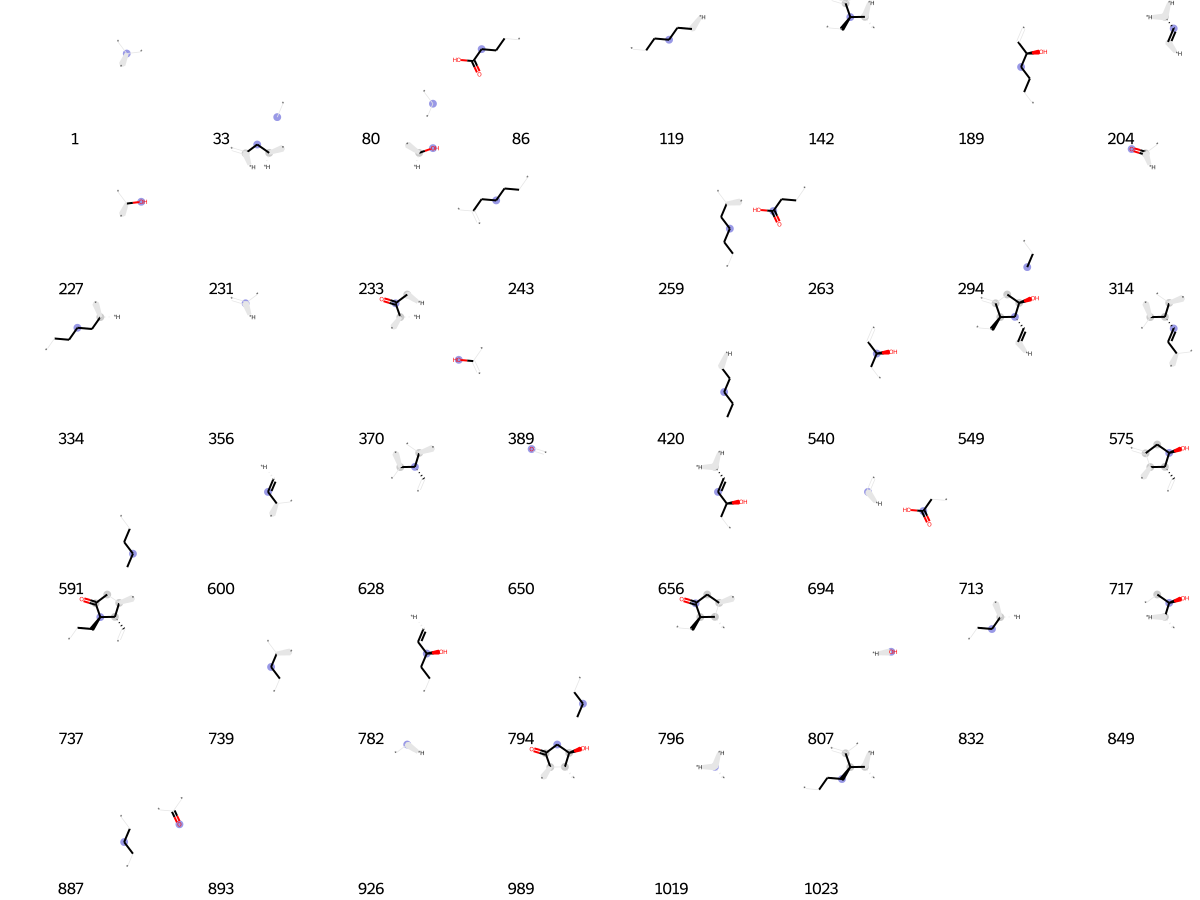

In [4771]:
prints = [(M24, x, bi) for x in fp24.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp24.GetOnBits ()])

In [4772]:
bi = {}

fp25= AllChem.GetMorganFingerprintAsBitVect(M25, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp25, fp_arr)
np.nonzero(fp_arr)
list(fp25.GetOnBits())

[33,
 64,
 80,
 128,
 139,
 147,
 166,
 175,
 177,
 184,
 191,
 212,
 214,
 259,
 271,
 294,
 302,
 356,
 405,
 461,
 575,
 623,
 641,
 650,
 652,
 684,
 695,
 698,
 714,
 726,
 734,
 792,
 807,
 839,
 843,
 849,
 852,
 875,
 881,
 893,
 926,
 935,
 956,
 972,
 978,
 1009]

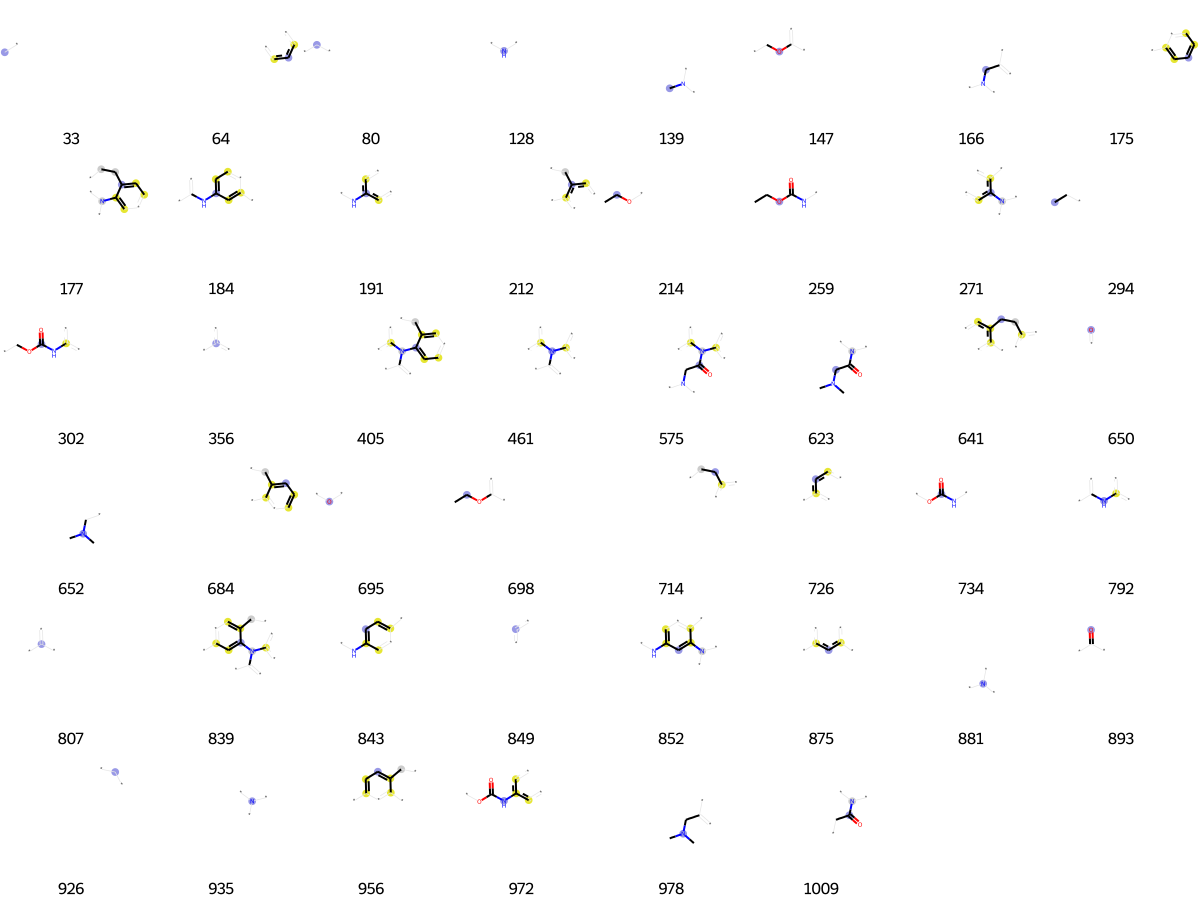

In [4773]:
prints = [(M25, x, bi) for x in fp25.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp25.GetOnBits ()])

In [4774]:
bi = {}

fp26= AllChem.GetMorganFingerprintAsBitVect(M26, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp26, fp_arr)
np.nonzero(fp_arr)
list(fp26.GetOnBits())

[0,
 1,
 33,
 41,
 64,
 80,
 102,
 119,
 147,
 175,
 221,
 222,
 268,
 278,
 283,
 301,
 341,
 356,
 381,
 389,
 396,
 423,
 482,
 498,
 557,
 575,
 601,
 643,
 650,
 658,
 695,
 721,
 726,
 762,
 778,
 803,
 807,
 849,
 854,
 893,
 926,
 1019]

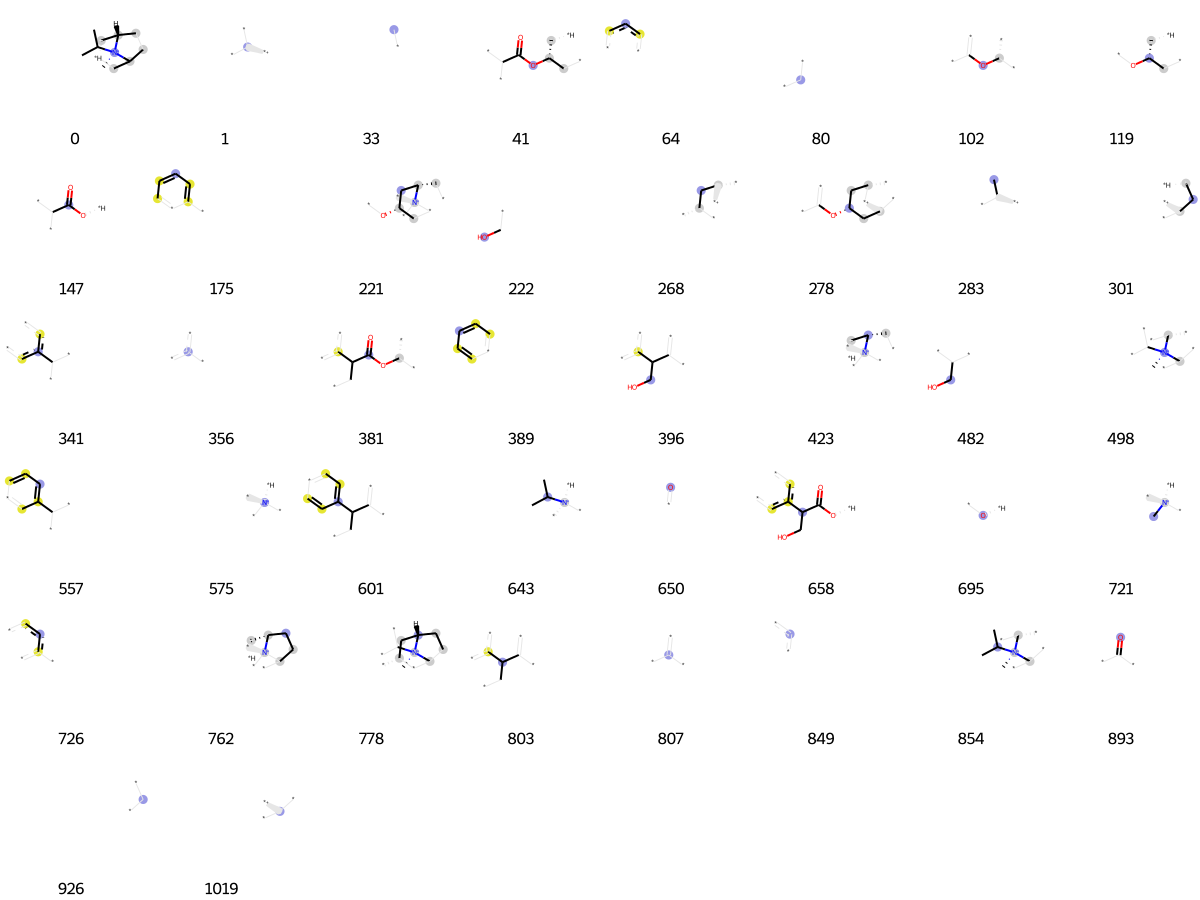

In [4775]:
prints = [(M26, x, bi) for x in fp26.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp26.GetOnBits ()])

In [4776]:
bi = {}

fp27= AllChem.GetMorganFingerprintAsBitVect(M27, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp27, fp_arr)
np.nonzero(fp_arr)
list(fp27.GetOnBits())

[2,
 4,
 33,
 47,
 128,
 301,
 307,
 319,
 331,
 350,
 356,
 361,
 387,
 428,
 452,
 454,
 502,
 582,
 610,
 617,
 631,
 650,
 673,
 715,
 726,
 796,
 807,
 849,
 883,
 890,
 893,
 926,
 965,
 1017,
 1018,
 1019]

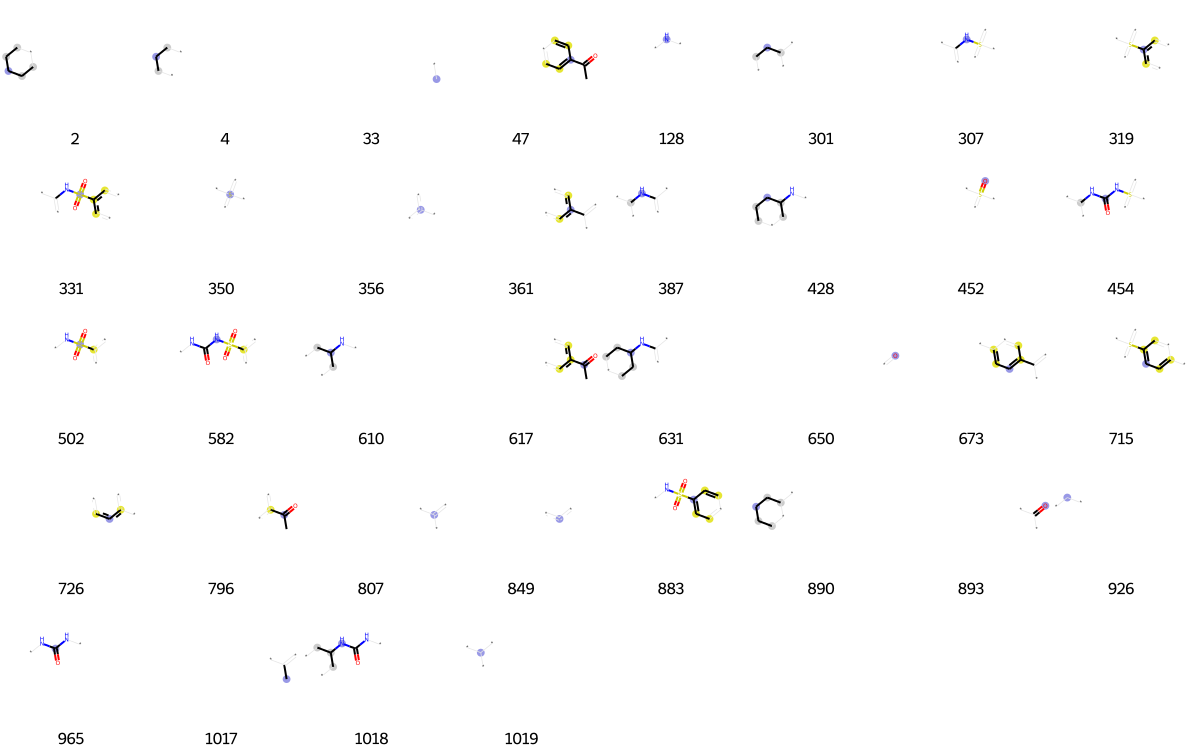

In [4777]:
prints = [(M27, x, bi) for x in fp27.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp27.GetOnBits ()])

In [4778]:
bi = {}

fp28= AllChem.GetMorganFingerprintAsBitVect(M28, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp28, fp_arr)
np.nonzero(fp_arr)
list(fp28.GetOnBits())

[4,
 12,
 13,
 36,
 67,
 90,
 95,
 122,
 128,
 130,
 199,
 200,
 216,
 264,
 301,
 305,
 325,
 327,
 330,
 356,
 362,
 381,
 396,
 421,
 459,
 470,
 475,
 480,
 483,
 491,
 507,
 531,
 570,
 574,
 602,
 626,
 650,
 661,
 699,
 701,
 726,
 807,
 816,
 832,
 849,
 875,
 888,
 890,
 891,
 893,
 904,
 926,
 935,
 947,
 967,
 985,
 1019]

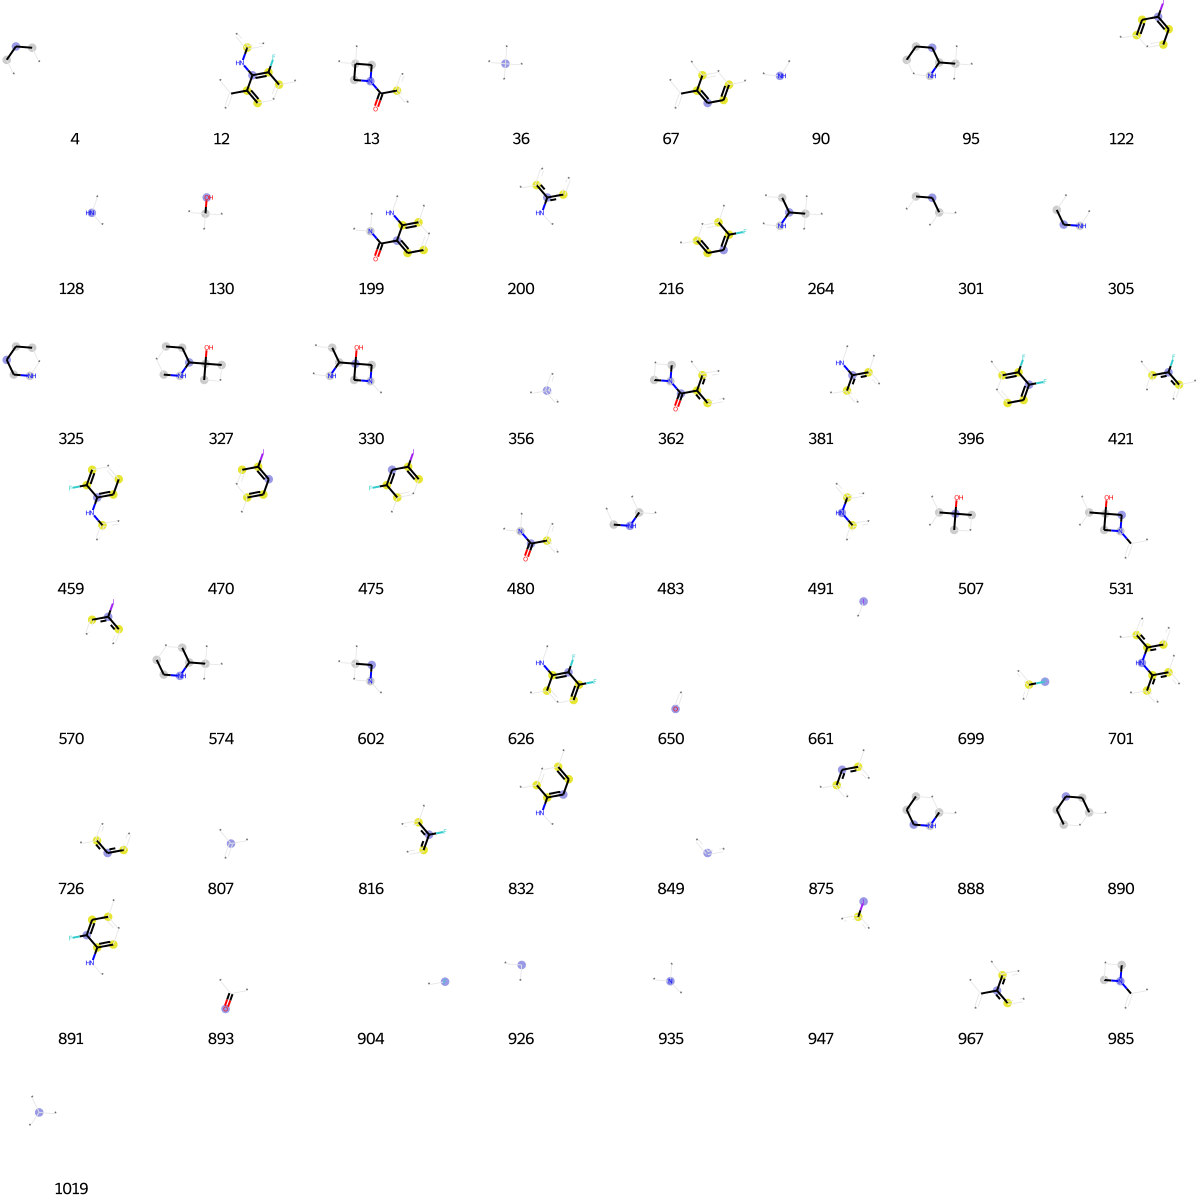

In [4779]:
prints = [(M28, x, bi) for x in fp28.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp28.GetOnBits ()])

In [4780]:
bi = {}

fp29= AllChem.GetMorganFingerprintAsBitVect(M29, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp29, fp_arr)
np.nonzero(fp_arr)
list(fp29.GetOnBits())

[20,
 33,
 36,
 61,
 65,
 90,
 112,
 125,
 128,
 138,
 188,
 200,
 208,
 209,
 230,
 250,
 258,
 296,
 323,
 330,
 336,
 347,
 349,
 356,
 360,
 378,
 463,
 468,
 470,
 484,
 486,
 552,
 566,
 588,
 591,
 618,
 650,
 656,
 657,
 674,
 679,
 692,
 706,
 714,
 718,
 726,
 727,
 757,
 773,
 790,
 792,
 806,
 807,
 831,
 832,
 849,
 855,
 893,
 926,
 947,
 976,
 980,
 1019]

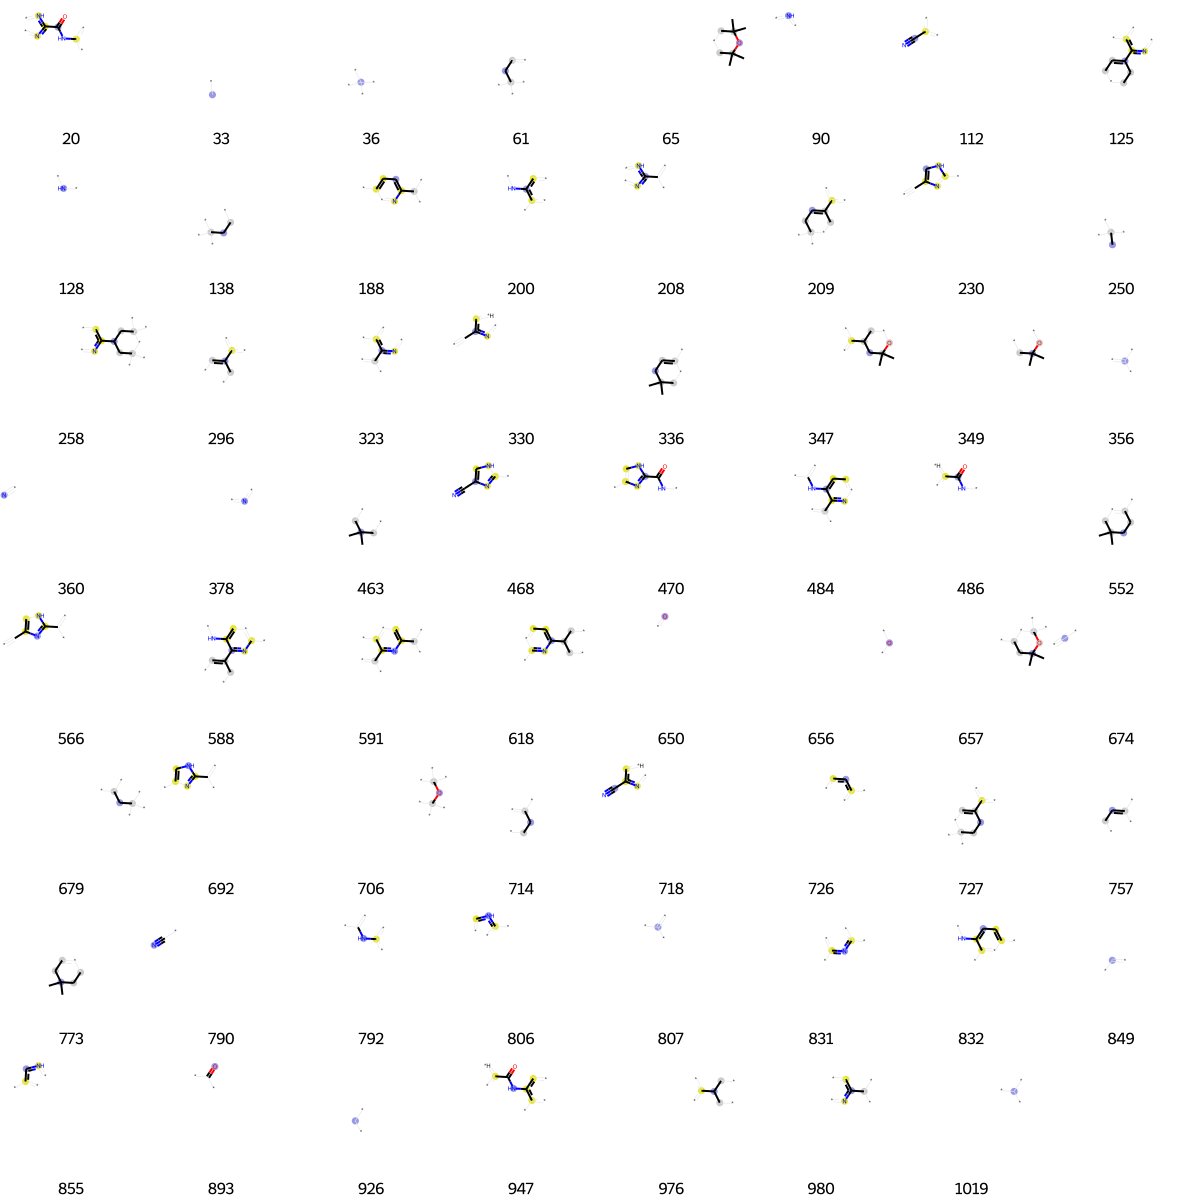

In [4781]:
prints = [(M29, x, bi) for x in fp29.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp29.GetOnBits ()])

In [4782]:
bi = {}

fp30= AllChem.GetMorganFingerprintAsBitVect(M30, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp30, fp_arr)
np.nonzero(fp_arr)
list(fp30.GetOnBits())

[15,
 23,
 33,
 64,
 94,
 128,
 175,
 200,
 252,
 356,
 365,
 367,
 389,
 423,
 456,
 491,
 500,
 590,
 650,
 672,
 698,
 726,
 807,
 849,
 882,
 893,
 911,
 967,
 975]

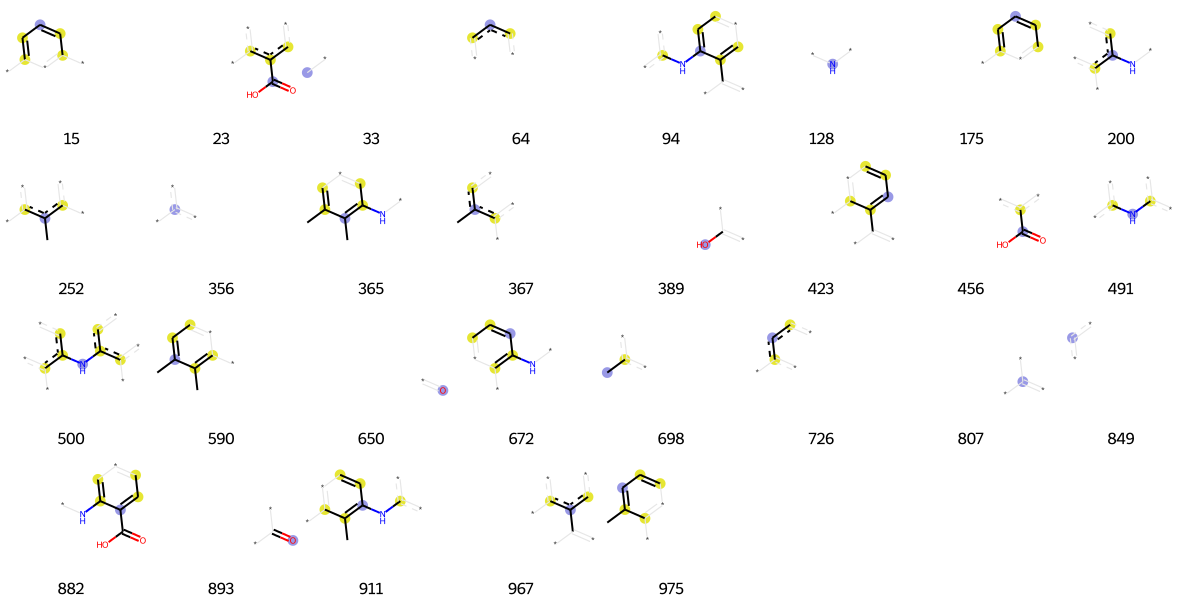

In [4783]:
prints = [(M30, x, bi) for x in fp30.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp30.GetOnBits ()])

In [4784]:
bi = {}

fp31= AllChem.GetMorganFingerprintAsBitVect(M31, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp31, fp_arr)
np.nonzero(fp_arr)
list(fp31.GetOnBits())

[5,
 33,
 42,
 61,
 64,
 78,
 80,
 82,
 92,
 102,
 112,
 119,
 128,
 130,
 145,
 147,
 169,
 175,
 214,
 251,
 263,
 294,
 301,
 307,
 335,
 350,
 356,
 360,
 361,
 371,
 378,
 389,
 402,
 407,
 448,
 452,
 456,
 482,
 525,
 619,
 649,
 650,
 674,
 689,
 695,
 698,
 726,
 730,
 759,
 790,
 807,
 813,
 831,
 838,
 849,
 875,
 893,
 926,
 935,
 967,
 974,
 1019]

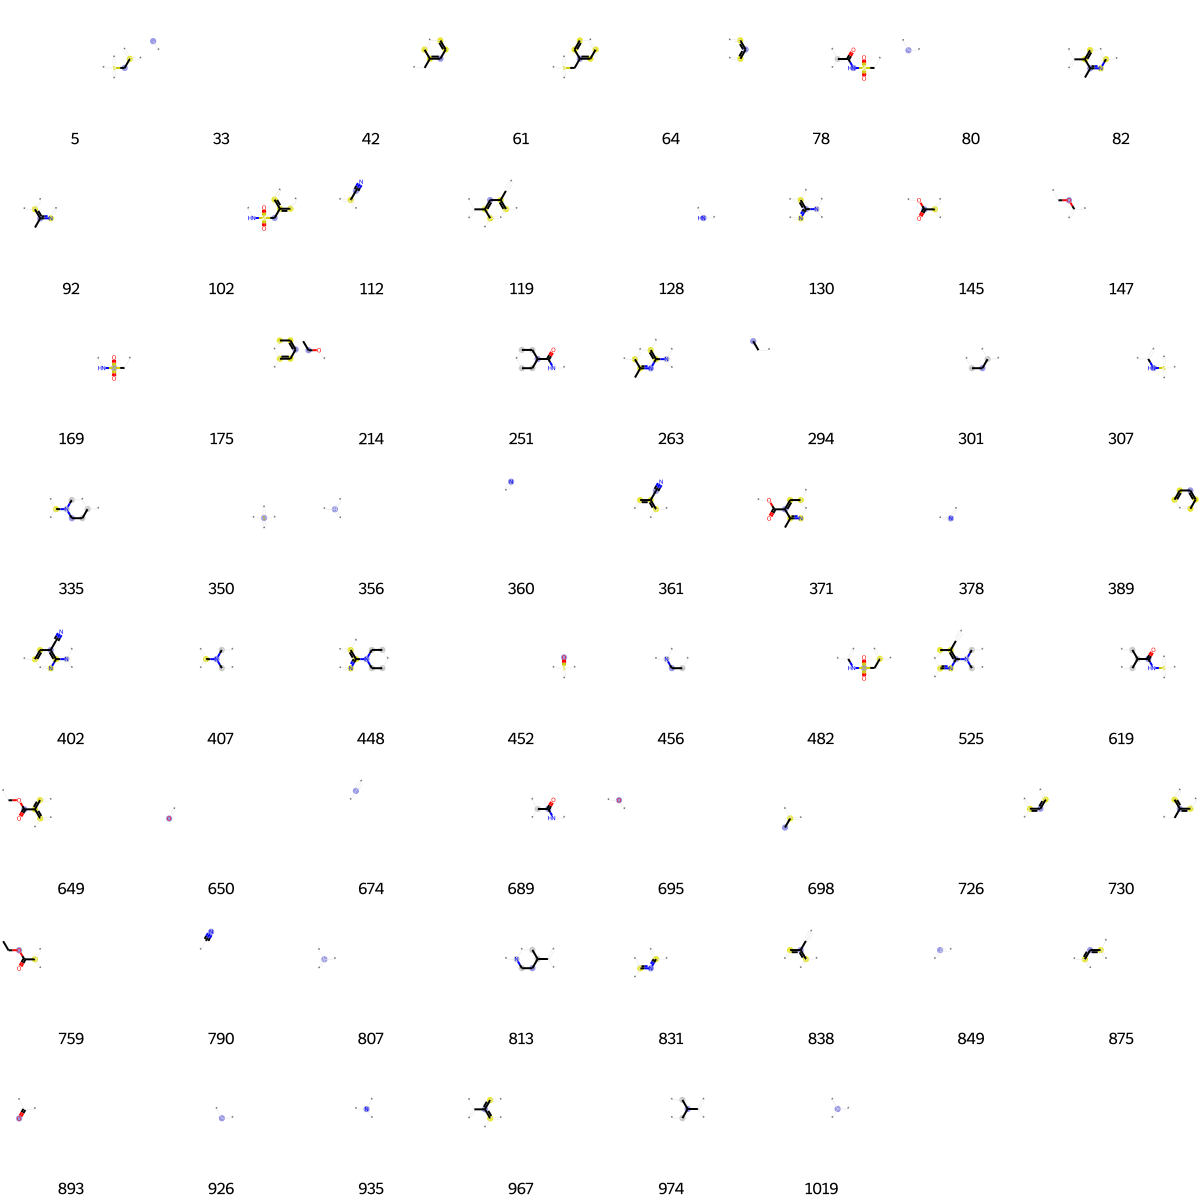

In [4785]:
prints = [(M31, x, bi) for x in fp31.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp31.GetOnBits ()])

In [4786]:
bi = {}

fp32= AllChem.GetMorganFingerprintAsBitVect(M32, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp32, fp_arr)
np.nonzero(fp_arr)
list(fp32.GetOnBits())

[33,
 41,
 80,
 119,
 128,
 170,
 197,
 222,
 243,
 294,
 332,
 401,
 416,
 420,
 473,
 540,
 565,
 591,
 597,
 650,
 667,
 694,
 723,
 731,
 775,
 794,
 807,
 887,
 893]

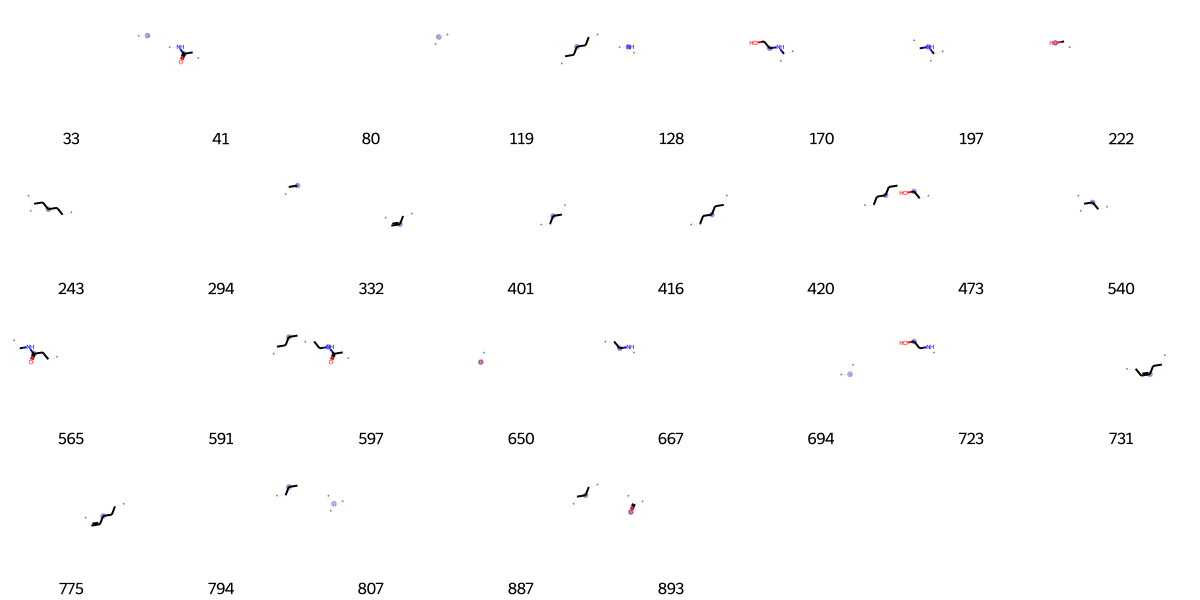

In [4787]:
prints = [(M32, x, bi) for x in fp32.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp32.GetOnBits ()])

In [4788]:
bi = {}

fp33= AllChem.GetMorganFingerprintAsBitVect(M33, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp33, fp_arr)
np.nonzero(fp_arr)
list(fp33.GetOnBits())

[14,
 19,
 33,
 36,
 64,
 74,
 80,
 90,
 100,
 121,
 129,
 130,
 175,
 207,
 212,
 271,
 277,
 288,
 289,
 314,
 352,
 356,
 378,
 420,
 426,
 428,
 446,
 448,
 456,
 461,
 474,
 527,
 538,
 568,
 623,
 633,
 650,
 726,
 767,
 807,
 842,
 849,
 893,
 926,
 935,
 958,
 984,
 1009,
 1016]

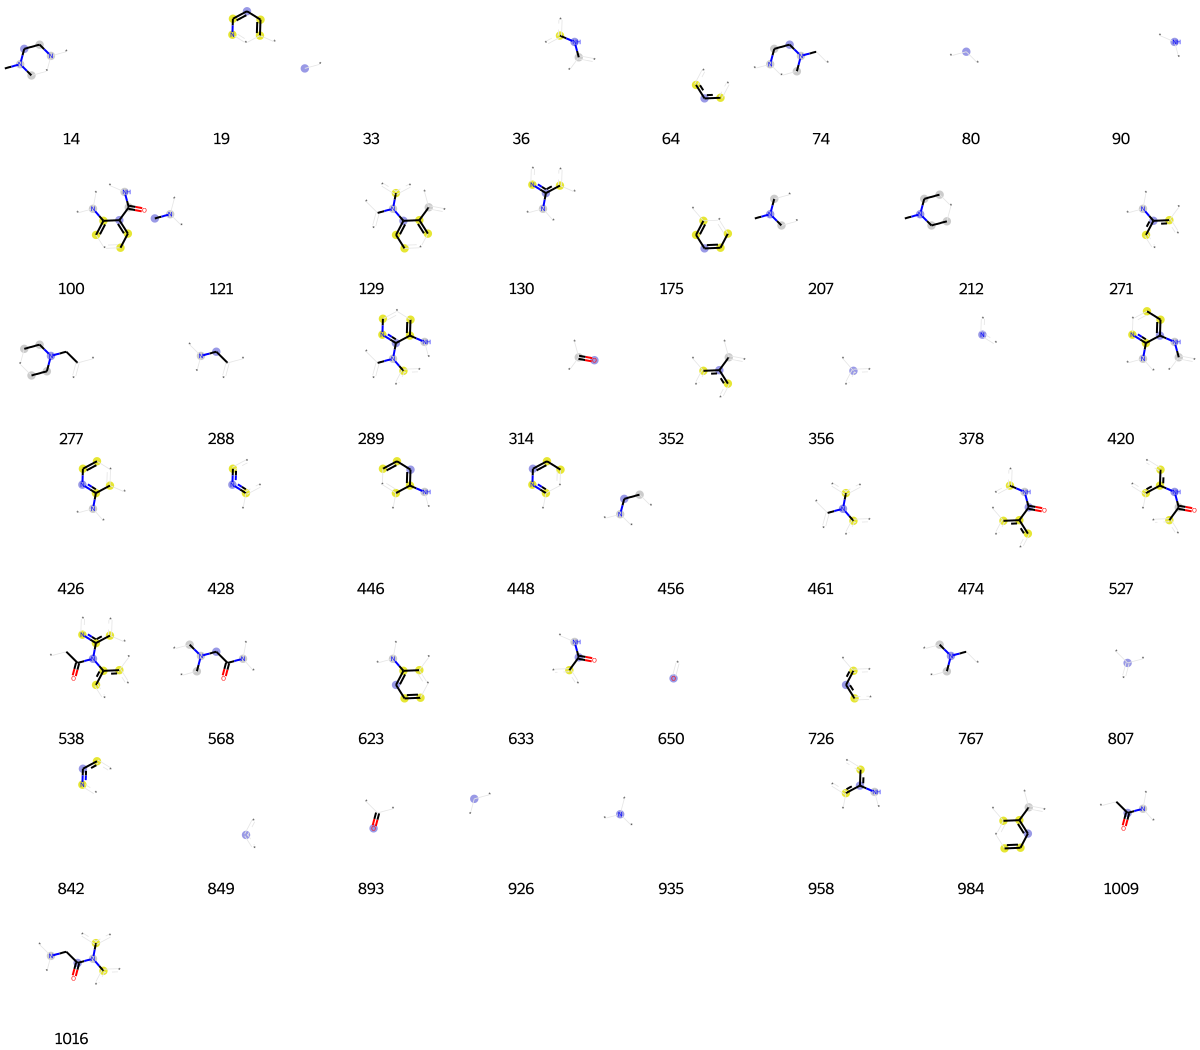

In [4789]:
prints = [(M33, x, bi) for x in fp33.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp33.GetOnBits ()])

In [4790]:
bi = {}

fp34= AllChem.GetMorganFingerprintAsBitVect(M34, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp34, fp_arr)
np.nonzero(fp_arr)
list(fp34.GetOnBits())

[11,
 33,
 45,
 64,
 88,
 90,
 121,
 175,
 182,
 227,
 231,
 235,
 247,
 261,
 301,
 333,
 356,
 378,
 385,
 428,
 457,
 464,
 511,
 549,
 619,
 650,
 671,
 676,
 710,
 713,
 714,
 726,
 760,
 777,
 806,
 807,
 834,
 849,
 866,
 893,
 924,
 926,
 935,
 967,
 974,
 1010,
 1019]

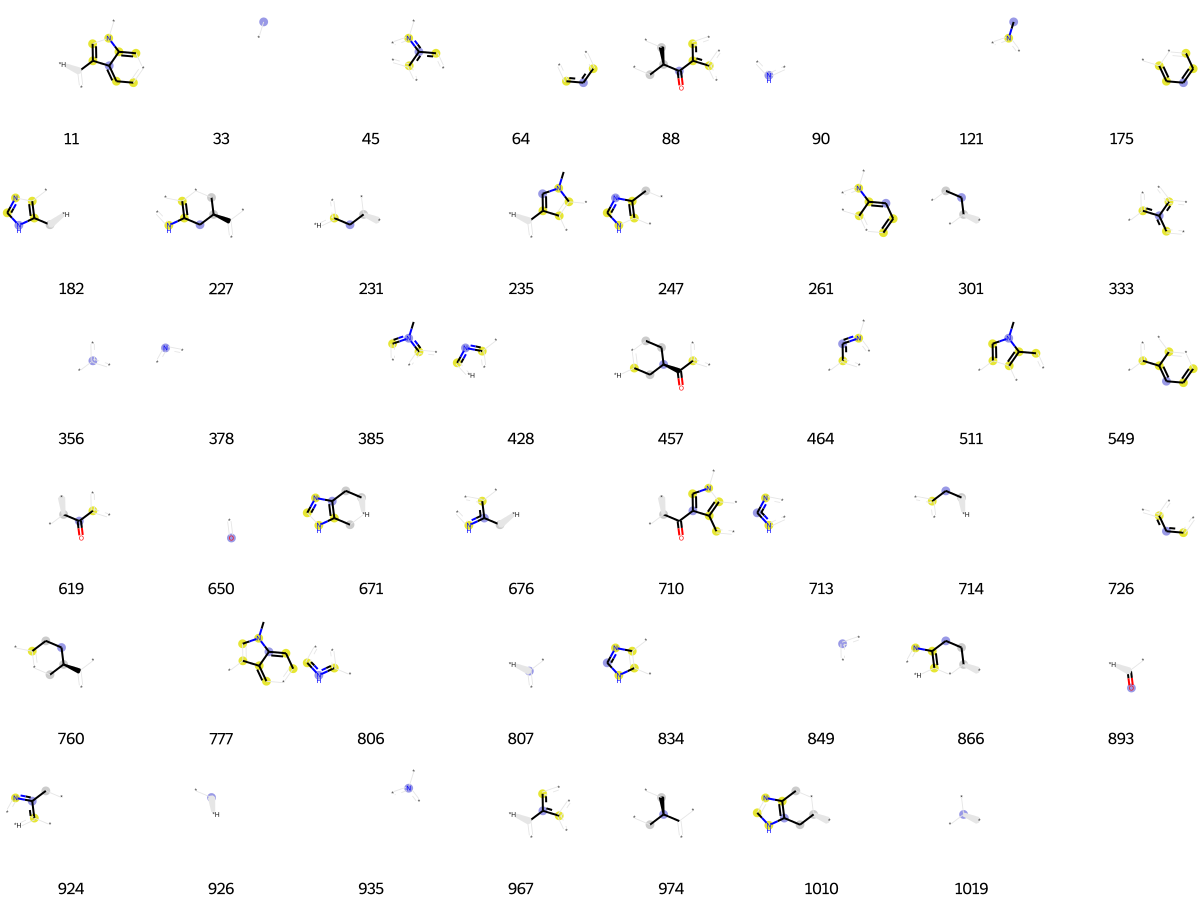

In [4791]:
prints = [(M34, x, bi) for x in fp34.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp34.GetOnBits ()])

In [4792]:
bi = {}

fp35= AllChem.GetMorganFingerprintAsBitVect(M35, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp35, fp_arr)
np.nonzero(fp_arr)
list(fp35.GetOnBits())

[1,
 15,
 33,
 41,
 64,
 80,
 117,
 128,
 165,
 175,
 197,
 216,
 265,
 283,
 341,
 356,
 361,
 389,
 416,
 486,
 524,
 526,
 552,
 557,
 561,
 592,
 603,
 650,
 659,
 671,
 691,
 726,
 807,
 834,
 849,
 875,
 893,
 905,
 961]

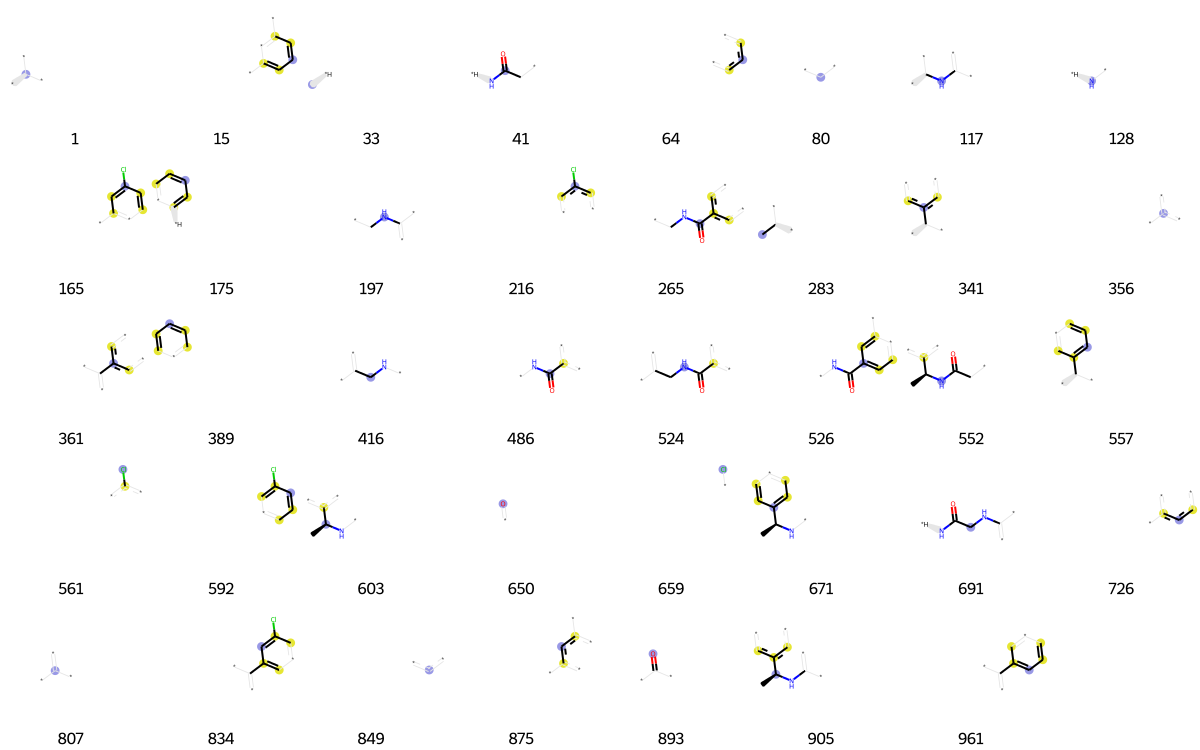

In [4793]:
prints = [(M35, x, bi) for x in fp35.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp35.GetOnBits ()])

In [4794]:
bi = {}

fp36= AllChem.GetMorganFingerprintAsBitVect(M36, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp36, fp_arr)
np.nonzero(fp_arr)
list(fp36.GetOnBits())

[10,
 13,
 33,
 36,
 80,
 90,
 102,
 145,
 219,
 252,
 294,
 310,
 314,
 320,
 322,
 356,
 360,
 378,
 384,
 419,
 424,
 428,
 432,
 444,
 458,
 511,
 620,
 650,
 655,
 675,
 695,
 718,
 724,
 726,
 730,
 756,
 775,
 807,
 816,
 849,
 885,
 970,
 987,
 1019]

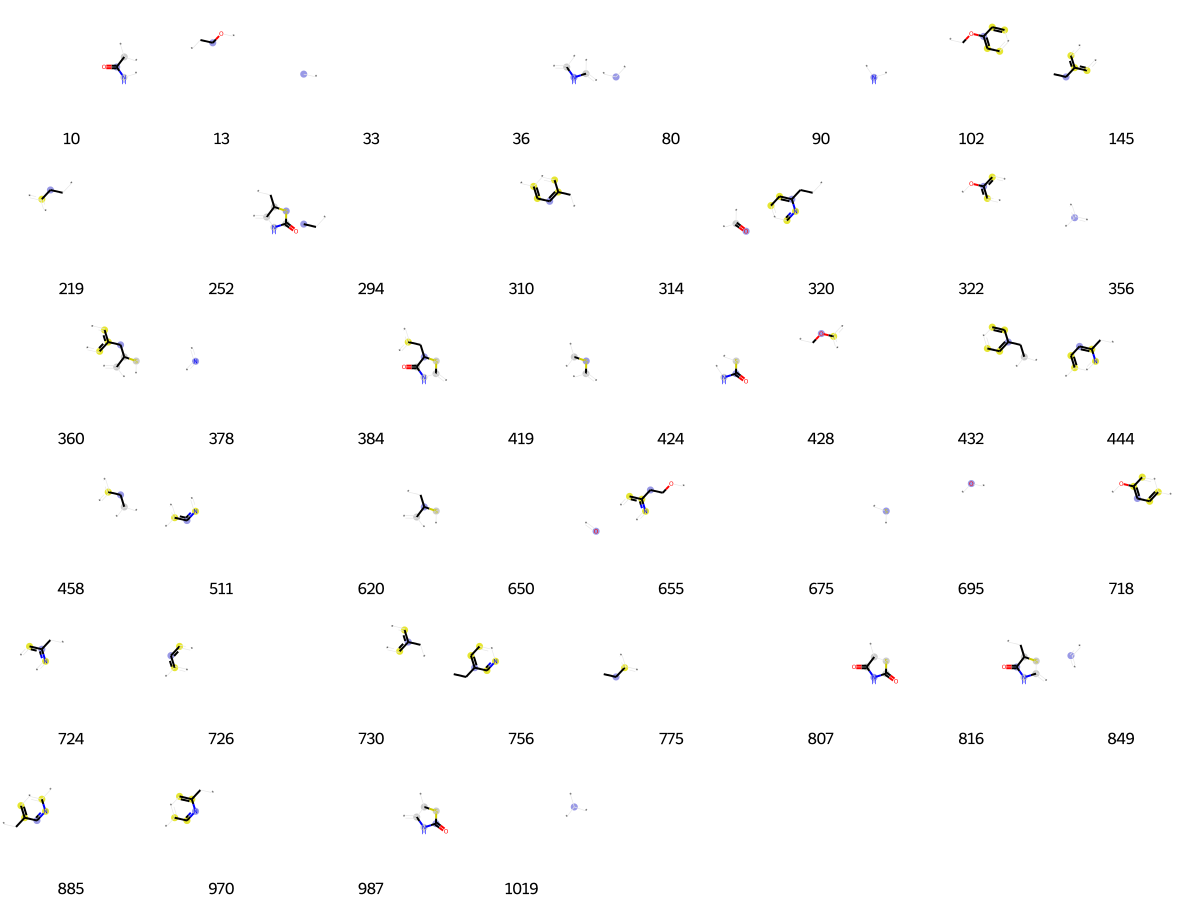

In [4795]:
prints = [(M36, x, bi) for x in fp36.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp36.GetOnBits ()])

In [4796]:
bi = {}

fp37= AllChem.GetMorganFingerprintAsBitVect(M37, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp37, fp_arr)
np.nonzero(fp_arr)
list(fp37.GetOnBits())

[13,
 15,
 33,
 46,
 63,
 64,
 80,
 81,
 85,
 88,
 92,
 102,
 121,
 139,
 140,
 175,
 185,
 219,
 227,
 233,
 250,
 262,
 268,
 314,
 318,
 322,
 333,
 350,
 352,
 356,
 363,
 378,
 381,
 386,
 389,
 404,
 407,
 411,
 416,
 417,
 428,
 435,
 452,
 456,
 458,
 484,
 494,
 523,
 549,
 575,
 585,
 650,
 654,
 656,
 676,
 687,
 695,
 698,
 718,
 723,
 726,
 739,
 745,
 763,
 767,
 801,
 802,
 807,
 808,
 825,
 831,
 849,
 861,
 881,
 882,
 887,
 893,
 921,
 926,
 932,
 935,
 946,
 950,
 984,
 1010]

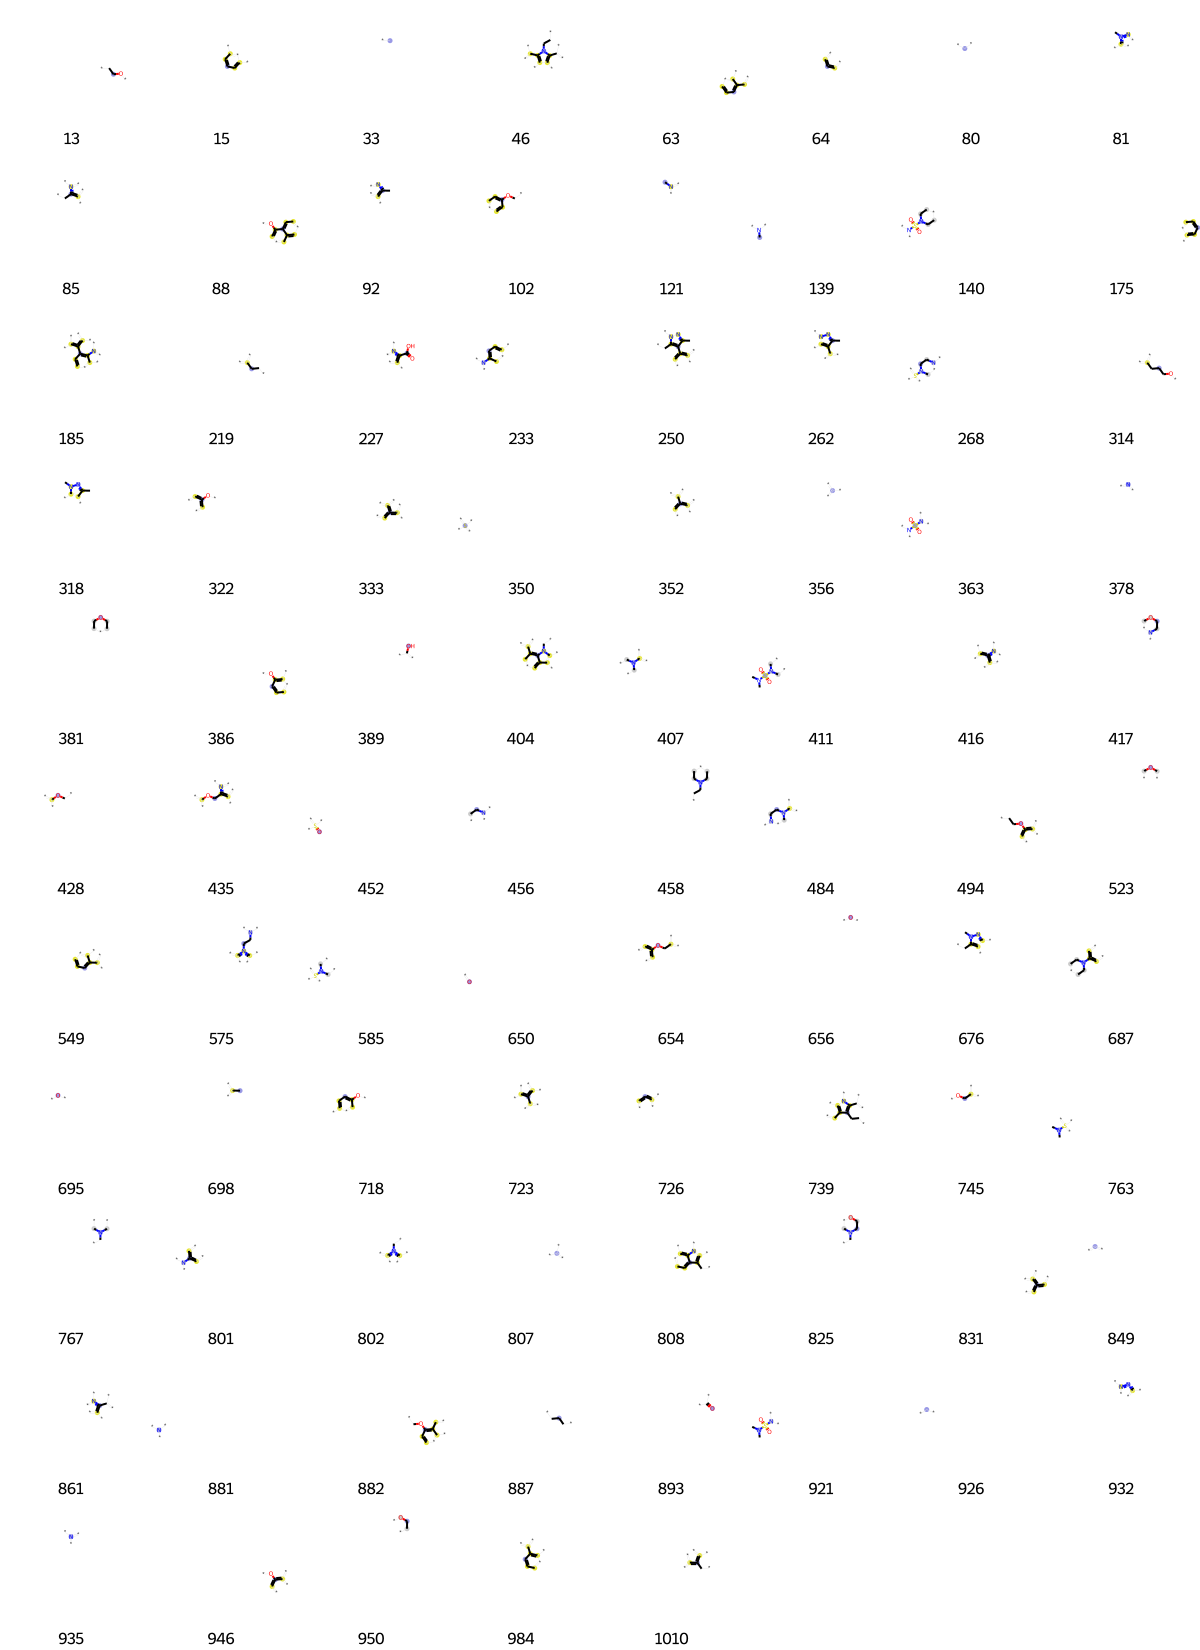

In [4797]:
prints = [(M37, x, bi) for x in fp37.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp37.GetOnBits ()])

In [4798]:
bi = {}

fp38= AllChem.GetMorganFingerprintAsBitVect(M38, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp38, fp_arr)
np.nonzero(fp_arr)
list(fp38.GetOnBits())

[74,
 90,
 106,
 120,
 140,
 143,
 147,
 216,
 356,
 377,
 378,
 409,
 433,
 506,
 578,
 600,
 635,
 702,
 772,
 806,
 807,
 831,
 867,
 922]

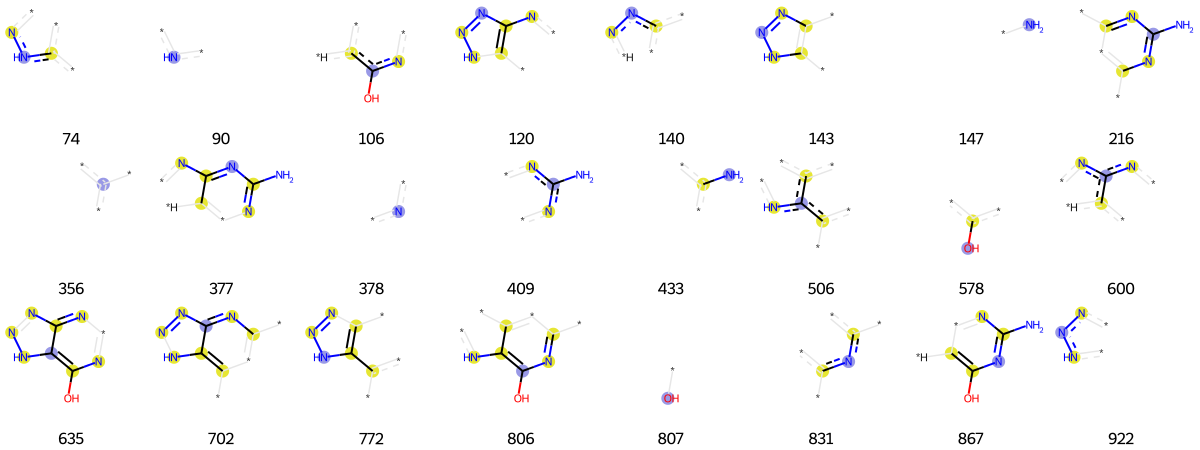

In [4799]:
prints = [(M38, x, bi) for x in fp38.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp38.GetOnBits ()])

In [4800]:
bi = {}

fp39= AllChem.GetMorganFingerprintAsBitVect(M39, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp39, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[15,
 33,
 43,
 57,
 64,
 80,
 90,
 121,
 136,
 179,
 197,
 200,
 205,
 209,
 216,
 222,
 260,
 323,
 352,
 356,
 378,
 394,
 451,
 464,
 473,
 511,
 560,
 617,
 695,
 698,
 699,
 707,
 726,
 747,
 807,
 811,
 815,
 816,
 827,
 831,
 849,
 855,
 873,
 875,
 880,
 896,
 904,
 935,
 936,
 940,
 980,
 984]

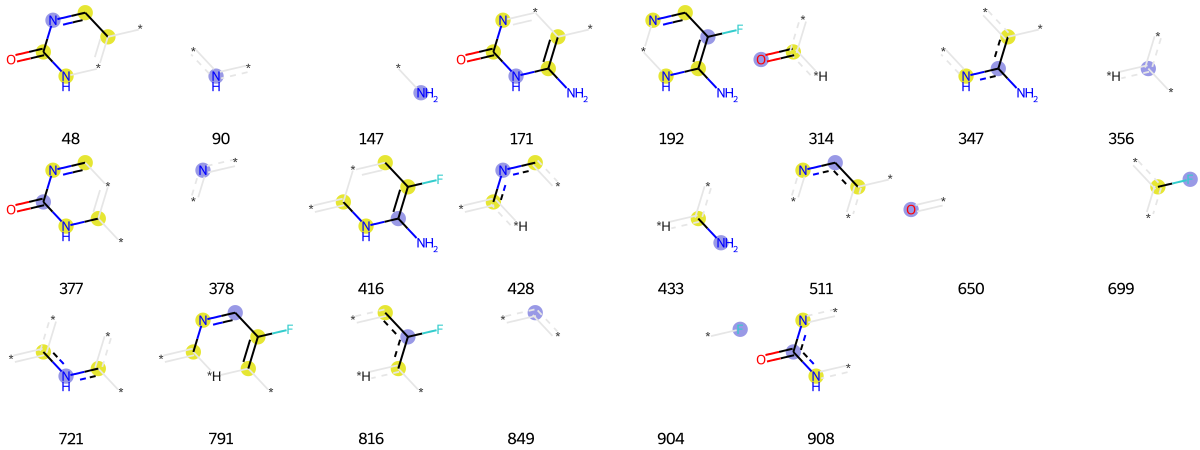

In [4801]:
prints = [(M39, x, bi) for x in fp39.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp39.GetOnBits ()])

In [4802]:
bi = {}

fp40= AllChem.GetMorganFingerprintAsBitVect(M40, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp40, fp_arr)
np.nonzero(fp_arr)
list(fp40.GetOnBits())

[1,
 15,
 29,
 33,
 42,
 64,
 80,
 96,
 102,
 112,
 117,
 121,
 136,
 158,
 207,
 212,
 217,
 221,
 285,
 301,
 305,
 314,
 322,
 356,
 360,
 361,
 378,
 425,
 428,
 456,
 511,
 574,
 650,
 672,
 674,
 695,
 710,
 726,
 730,
 736,
 741,
 744,
 749,
 790,
 800,
 806,
 818,
 849,
 859,
 867,
 875,
 925,
 926,
 932,
 935,
 945,
 951,
 980,
 993,
 1006,
 1009,
 1019]

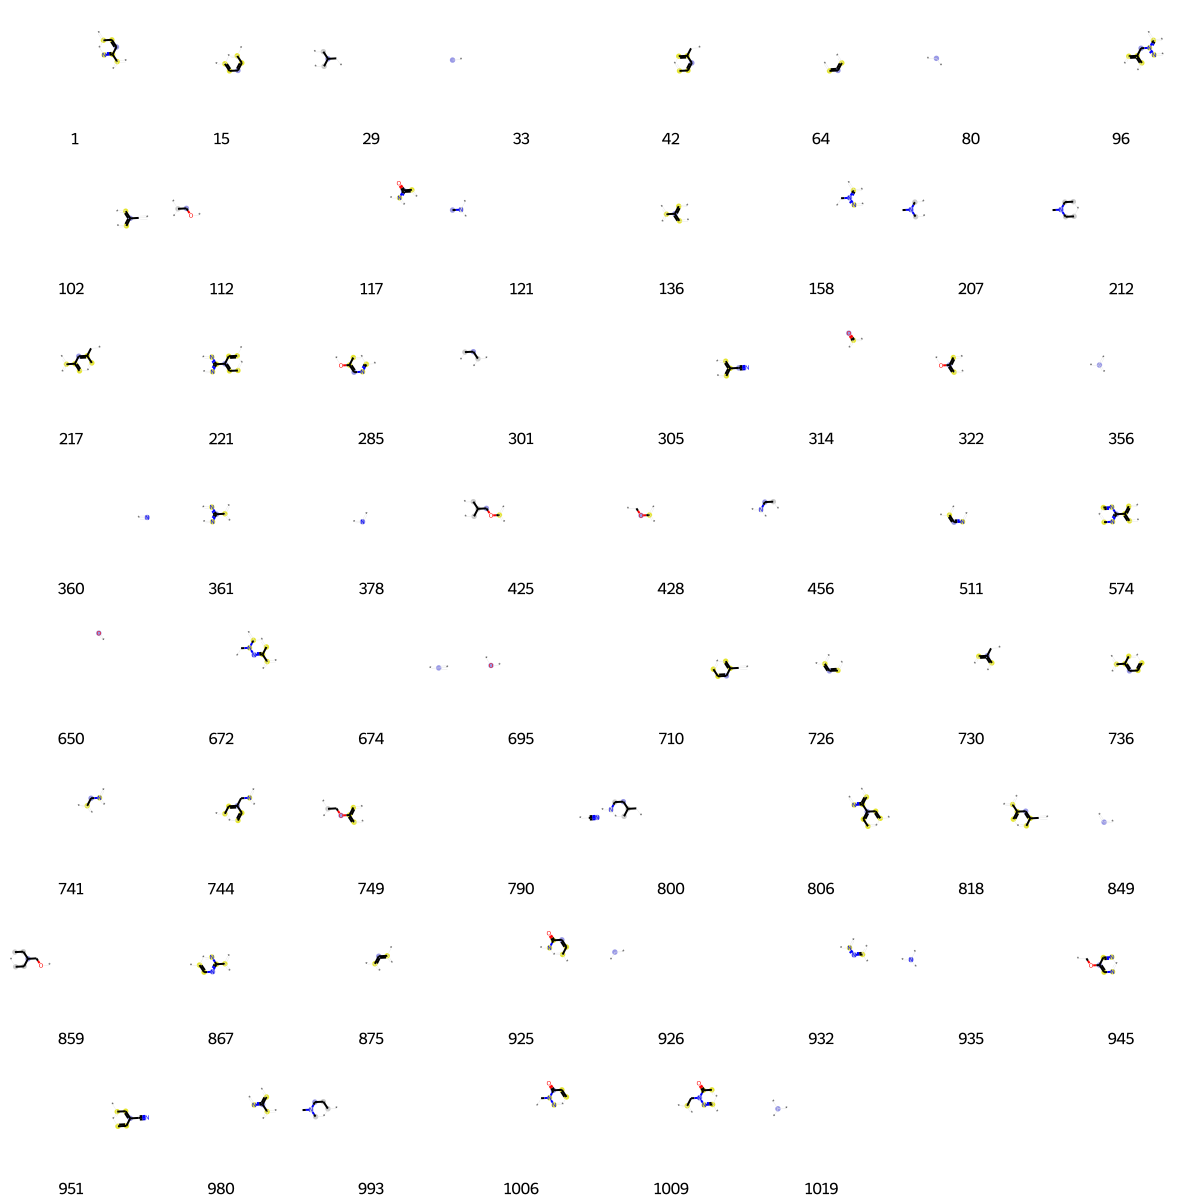

In [4803]:
prints = [(M40, x, bi) for x in fp40.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp40.GetOnBits ()])

In [4804]:
bi = {}

fp41= AllChem.GetMorganFingerprintAsBitVect(M41, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp41, fp_arr)
np.nonzero(fp_arr)
list(fp41.GetOnBits())

[1,
 5,
 21,
 33,
 42,
 64,
 80,
 97,
 128,
 147,
 175,
 177,
 187,
 212,
 214,
 219,
 242,
 271,
 288,
 294,
 301,
 307,
 314,
 356,
 377,
 389,
 422,
 530,
 573,
 588,
 623,
 650,
 662,
 684,
 695,
 698,
 713,
 714,
 726,
 730,
 736,
 739,
 794,
 807,
 823,
 849,
 893,
 926,
 935,
 976,
 985,
 1019]

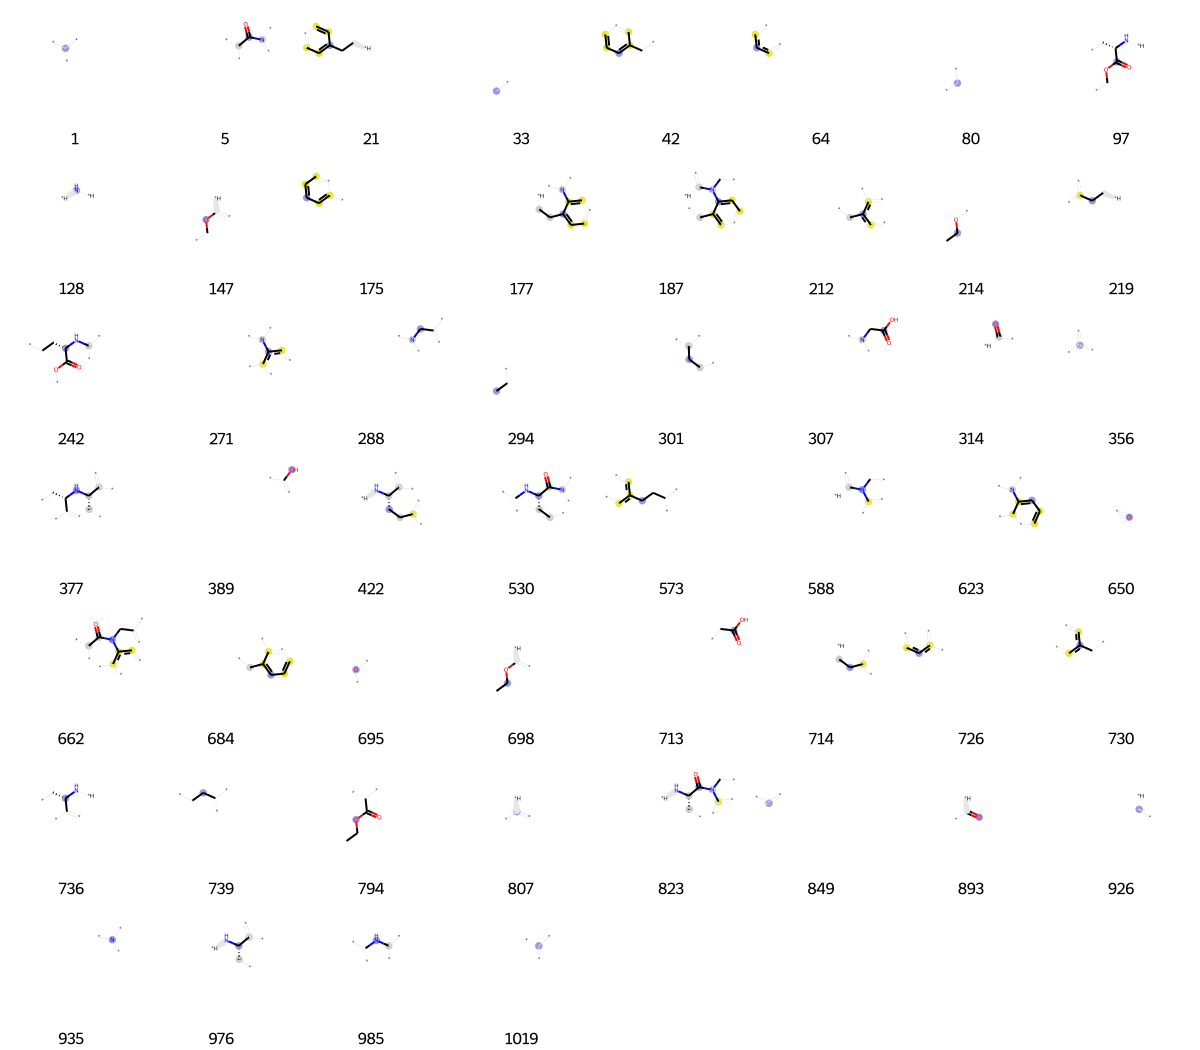

In [4805]:
prints = [(M41, x, bi) for x in fp41.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp41.GetOnBits ()])

In [4806]:
bi = {}

fp42= AllChem.GetMorganFingerprintAsBitVect(M42, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp42, fp_arr)
np.nonzero(fp_arr)
list(fp42.GetOnBits())

[20,
 33,
 56,
 73,
 75,
 128,
 160,
 200,
 221,
 240,
 248,
 249,
 272,
 322,
 333,
 346,
 356,
 363,
 366,
 374,
 378,
 412,
 428,
 430,
 504,
 512,
 518,
 561,
 573,
 593,
 613,
 624,
 647,
 650,
 656,
 659,
 673,
 695,
 698,
 718,
 726,
 780,
 787,
 792,
 807,
 832,
 841,
 842,
 849,
 875,
 888,
 893,
 946,
 965]

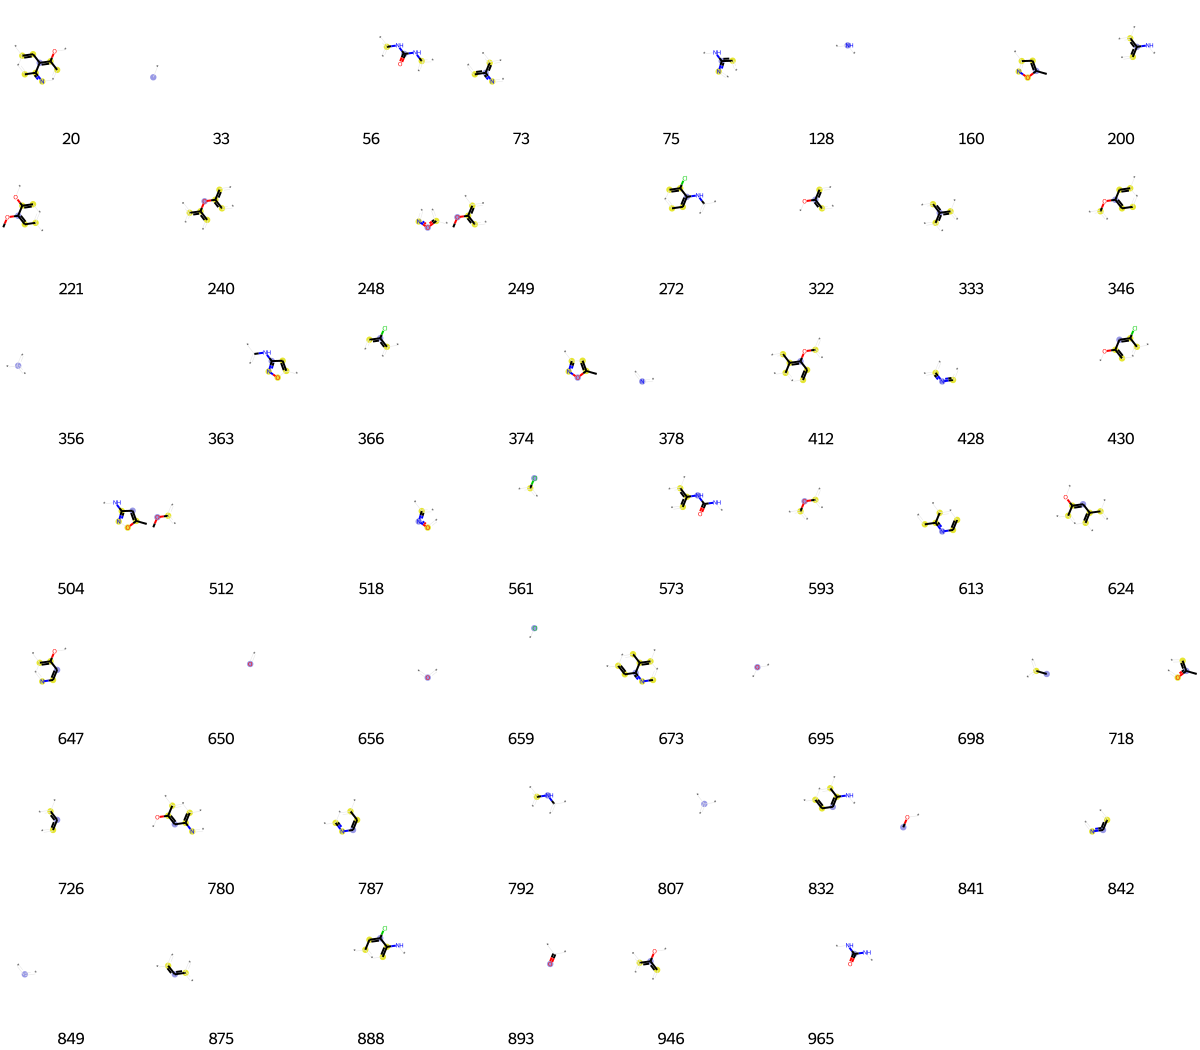

In [4807]:
prints = [(M42, x, bi) for x in fp42.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp42.GetOnBits ()])

In [4808]:
bi = {}

fp43= AllChem.GetMorganFingerprintAsBitVect(M43, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp43, fp_arr)
np.nonzero(fp_arr)
list(fp43.GetOnBits())

[1,
 27,
 33,
 36,
 42,
 64,
 71,
 80,
 108,
 114,
 117,
 118,
 128,
 135,
 138,
 147,
 175,
 224,
 246,
 271,
 320,
 350,
 356,
 389,
 392,
 436,
 438,
 444,
 452,
 456,
 457,
 488,
 535,
 559,
 602,
 611,
 615,
 623,
 629,
 641,
 650,
 675,
 692,
 695,
 726,
 730,
 731,
 736,
 745,
 751,
 805,
 807,
 849,
 893,
 896,
 926,
 935,
 948,
 956,
 966,
 968,
 985,
 1018]

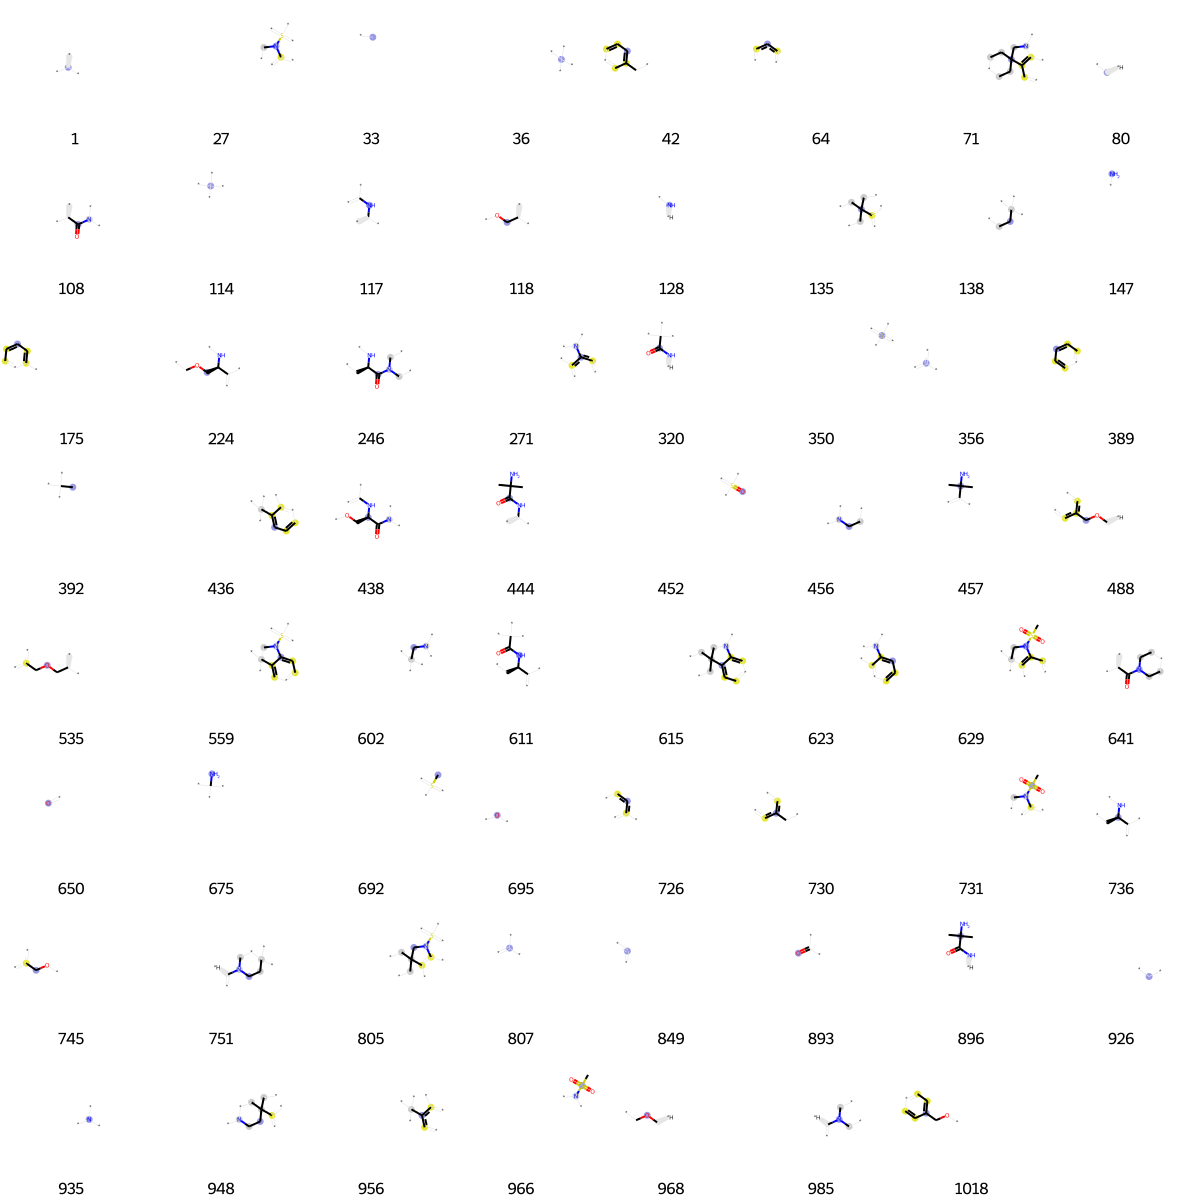

In [4809]:
prints = [(M43, x, bi) for x in fp43.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp43.GetOnBits ()])

In [4810]:
bi = {}

fp44= AllChem.GetMorganFingerprintAsBitVect(M44, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp44, fp_arr)
np.nonzero(fp_arr)
list(fp44.GetOnBits())

[18,
 19,
 64,
 192,
 202,
 203,
 254,
 319,
 320,
 322,
 333,
 350,
 356,
 378,
 392,
 428,
 448,
 452,
 456,
 471,
 504,
 549,
 578,
 592,
 613,
 626,
 650,
 656,
 674,
 700,
 715,
 725,
 726,
 760,
 787,
 807,
 830,
 831,
 836,
 842,
 849,
 875,
 897,
 915,
 931,
 936]

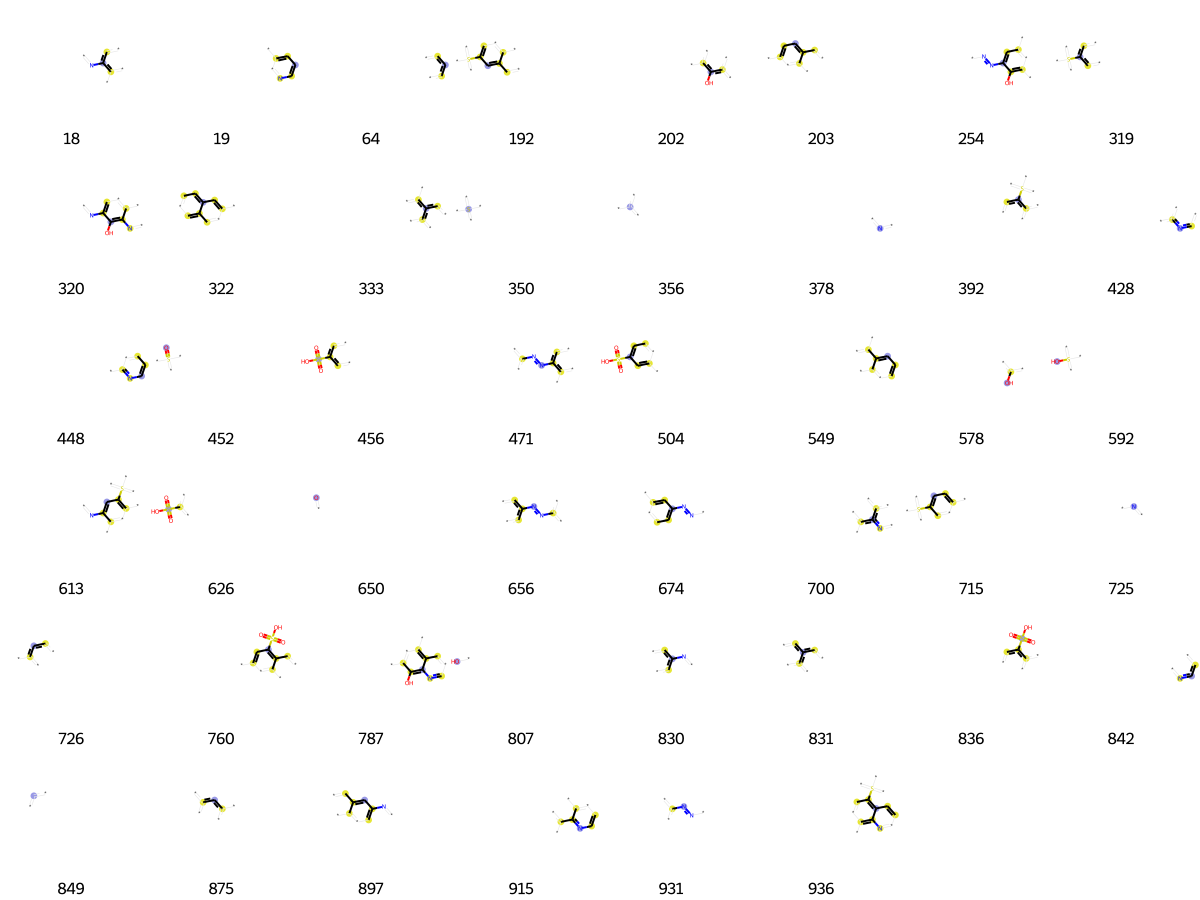

In [4811]:
prints = [(M44, x, bi) for x in fp44.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp44.GetOnBits ()])

In [4812]:
bi = {}

fp45= AllChem.GetMorganFingerprintAsBitVect(M45, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp45, fp_arr)
np.nonzero(fp_arr)
list(fp45.GetOnBits())

[80,
 224,
 277,
 288,
 307,
 381,
 389,
 417,
 456,
 514,
 523,
 650,
 656,
 713,
 767,
 807,
 825,
 893,
 926,
 935,
 950]

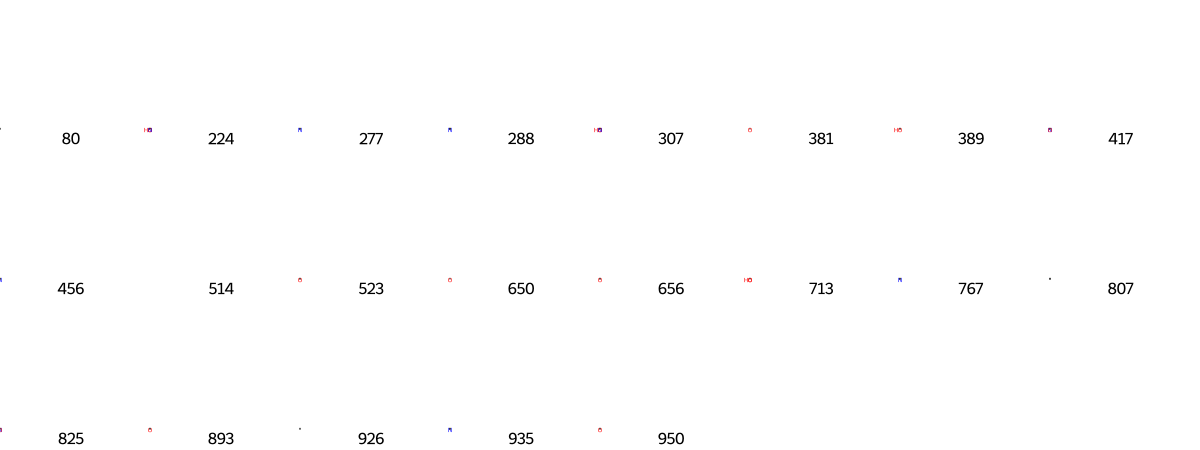

In [4813]:
prints = [(M45, x, bi) for x in fp45.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp45.GetOnBits ()])

In [4814]:
bi = {}

fp46= AllChem.GetMorganFingerprintAsBitVect(M46, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp46, fp_arr)
np.nonzero(fp_arr)
list(fp46.GetOnBits())

[3,
 25,
 33,
 36,
 90,
 94,
 102,
 112,
 114,
 215,
 221,
 249,
 262,
 273,
 281,
 305,
 314,
 326,
 356,
 358,
 360,
 419,
 424,
 429,
 451,
 501,
 512,
 531,
 576,
 593,
 633,
 650,
 674,
 675,
 694,
 695,
 726,
 749,
 790,
 804,
 809,
 841,
 849,
 875,
 887,
 904,
 926,
 930,
 946,
 951,
 1009,
 1020]

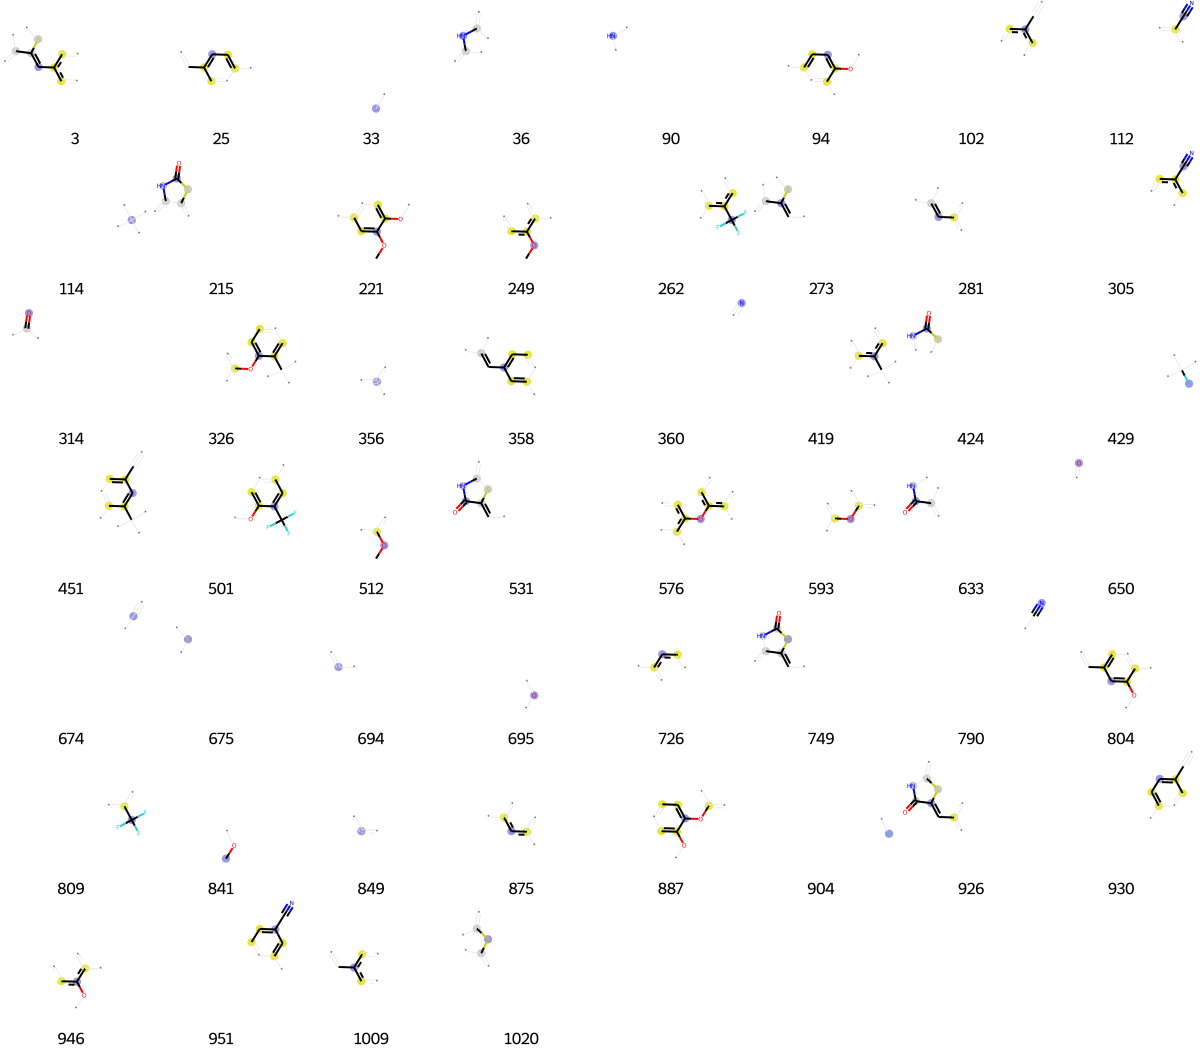

In [4815]:
prints = [(M46, x, bi) for x in fp46.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp46.GetOnBits ()])

In [4816]:
bi = {}

fp47= AllChem.GetMorganFingerprintAsBitVect(M47, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp47, fp_arr)
np.nonzero(fp_arr)
list(fp47.GetOnBits())

[4,
 33,
 65,
 80,
 99,
 114,
 151,
 158,
 191,
 257,
 314,
 319,
 320,
 356,
 414,
 419,
 456,
 507,
 544,
 583,
 628,
 650,
 673,
 674,
 714,
 735,
 798,
 926,
 935]

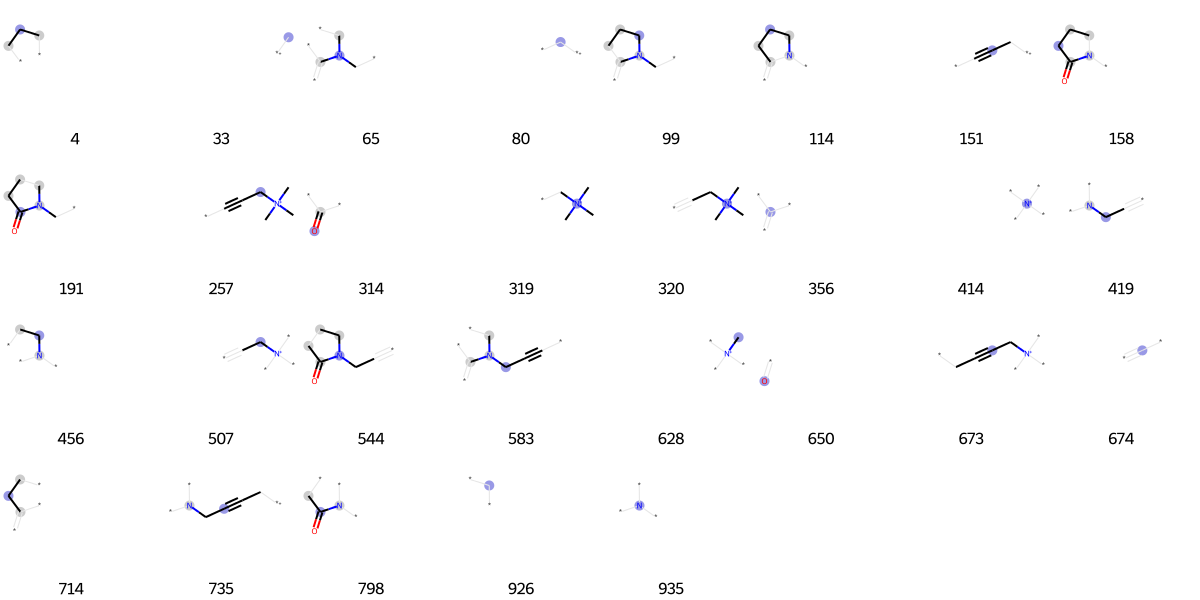

In [4817]:
prints = [(M47, x, bi) for x in fp47.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp47.GetOnBits ()])

In [4818]:
bi = {}

fp48= AllChem.GetMorganFingerprintAsBitVect(M48, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp48, fp_arr)
np.nonzero(fp_arr)
list(fp48.GetOnBits())

[33,
 64,
 121,
 128,
 144,
 145,
 147,
 175,
 274,
 280,
 329,
 333,
 352,
 356,
 406,
 423,
 433,
 580,
 623,
 630,
 647,
 650,
 656,
 667,
 680,
 695,
 704,
 709,
 710,
 723,
 726,
 743,
 752,
 760,
 784,
 794,
 807,
 840,
 841,
 849,
 875,
 888,
 893,
 906,
 936,
 957,
 967,
 984]

In [4819]:
bi = {}

fp49= AllChem.GetMorganFingerprintAsBitVect(M49, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp49, fp_arr)
np.nonzero(fp_arr)
list(fp49.GetOnBits())

[21,
 42,
 80,
 106,
 116,
 140,
 144,
 147,
 158,
 219,
 310,
 356,
 623,
 653,
 726,
 730,
 807,
 849,
 934,
 942]

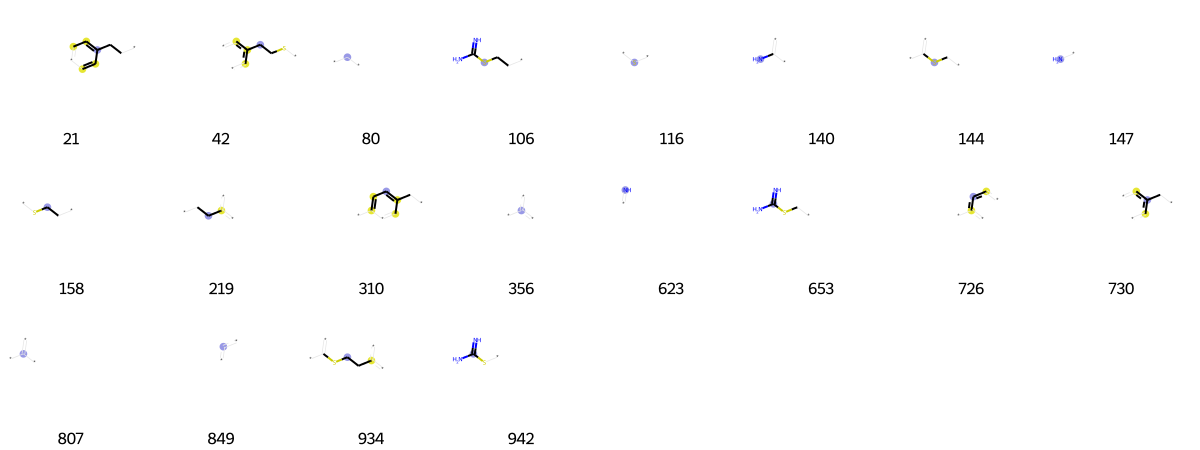

In [4820]:
prints = [(M49, x, bi) for x in fp49.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp49.GetOnBits ()])

In [4821]:
bi = {}

fp50= AllChem.GetMorganFingerprintAsBitVect(M50, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp50, fp_arr)
np.nonzero(fp_arr)
list(fp50.GetOnBits())

[18,
 88,
 133,
 202,
 314,
 333,
 350,
 352,
 356,
 389,
 433,
 456,
 502,
 525,
 561,
 574,
 578,
 580,
 582,
 586,
 589,
 602,
 642,
 650,
 656,
 659,
 661,
 665,
 676,
 682,
 712,
 723,
 742,
 807,
 828,
 837,
 849,
 865,
 875,
 882,
 893,
 945,
 947,
 955,
 981,
 1004,
 1011]